In [2]:
#Standard modules
import pandas as pd
import numpy as np
import matplotlib as pltlib
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import random

#Additional modules: exporting dataframes to png
import pip
pip.main(['install','dataframe_image', '--quiet'])

import dataframe_image as dfi  

c:\Users\user\anaconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
costs=pd.read_csv('Support_data/cost.csv')
suppliers=pd.read_csv('Support_data/suppliers.csv')
tasks=pd.read_excel('Support_data/tasks.xlsx')

# 1. Data preparation


## 1.1: Initial inspection and data correction

##### To check the structure and the elements of the datasets: 

In [4]:
costs.head()            

Task ID Supplier ID      Cost
0  30/05/2019          S1  0.478219
1  30/05/2019          S2  0.444543
2  30/05/2019          S3  0.521679
3  30/05/2019          S4  0.307331
4  30/05/2019          S5  0.357689

In [5]:
tasks.head()            

Task ID  TF1   TF2        TF3   TF4       TF5       TF6   TF7   TF8  \
0  2019 05 30  706  2539  428536374   367  0.144545  35342375  0.08   829   
1  2019 09 26  697  2199  389831692   431  0.195998  20091114  0.05   460   
2  2019 11 29  262  4156  500027098  1510  0.363330  89708355  0.18  1010   
3  2020 01 03  469  4346  547810586  1376  0.316613  90478530  0.17  1097   
4  2020 01 07  555  3934  521676289  1039  0.264108  69762831  0.13   943   

        TF9  ...  TF107  TF108      TF109       TF110     TF111  TF112  TF113  \
0  0.326506  ...    125      0  219407.09   903728.98  10174793      0    801   
1  0.209186  ...    149      0  467568.10  1868010.80  19221510      0    723   
2  0.243022  ...    394      0  228358.20  1358750.92  38657530      0    837   
3  0.252416  ...    394      0  258487.96  1781016.69  39064840      0    706   
4  0.239705  ...    394      0  285558.89  1869912.30  39064840      0    757   

      TF114     TF115  TF116  
0  0.315479  26873722   0.06  
1  0.328786  20359365   0.05  
2  0.201396  28562699   0.06  
3  0.162448  19579305   0.04  
4  0.192425  24164620   0.05  

[5 rows x 117 columns]

In [6]:
suppliers.head()

Supplier ID  SF1   SF2   SF3  SF4  SF5  SF6  SF7  SF8   SF9  SF10  SF11  \
0          S1  100  1000  1000   50   20   10    2   80  2000   100  1000   
1          S2  100  1000  1000   50   20   10    0   80  2000   100  1000   
2          S3  100  1000  1000   50   20   10    2   80  2000   100  1000   
3          S4  100  1000  1000   50   20   10    2   80  2000   100  1000   
4          S5   10  1000   100  500  200   10    2   80   200   100  2000   

   SF12  SF13  SF14  SF15  SF16   SF17  SF18  
0     5  1000  1000   500  5000    100    96  
1     5  1000  1000   500  5000    100    96  
2     5  1000  1000   500  5000      0    96  
3     5  1000  1000   500  5000   5000    96  
4     8  2000   100  2000  5000  15000    90

In [7]:
#DataFrame structure and data type 
print(costs.info())     
print(tasks.info())     
print(suppliers.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7680 entries, 0 to 7679
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Task ID      7680 non-null   object 
 1   Supplier ID  7680 non-null   object 
 2   Cost         7680 non-null   float64
dtypes: float64(1), object(2)
memory usage: 180.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 117 entries, Task ID to TF116
dtypes: float64(58), int64(58), object(1)
memory usage: 119.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Supplier ID  64 non-null     object
 1   SF1          64 non-null     int64 
 2   SF2          64 non-null     int64 
 3   SF3          64 non-null     int64 
 4   SF4          64 non-null     int64 
 5   SF5          64 non-null     int64 
 6   SF6    

### Data Description: 
#### Count the number of tasks, suppliers, features and cost values in all data sets

In [8]:
#tasks
print("'tasks' dataset contains:\n{} tasks\n{} task features".format(len(tasks),len(tasks.columns[1:])))
#suppliers
print("\n'suppliers' dataset contains:\n{} suppliers\n{} supplier features".format(len(suppliers),len(suppliers.columns[1:])))
#costs
print("\n'costs' dataset contains:\n{} tasks\n{} suppliers\n{} cost values".format(len(costs.loc[:,'Task ID'].unique()), \
    len(costs.loc[:,'Supplier ID'].unique()), len(costs.loc[:, 'Cost'])))

'tasks' dataset contains:
130 tasks
116 task features

'suppliers' dataset contains:
64 suppliers
18 supplier features

'costs' dataset contains:
120 tasks
64 suppliers
7680 cost values


##### The format of the tasks ID do not match between tasks and costs dataframe.
Both are objects (strings) : Change the Format to [dd-mm-yy]

Before changing the format: 

In [9]:
tasks['Task ID'].head(2)

0    2019 05 30
1    2019 09 26
Name: Task ID, dtype: object

In [10]:
costs['Task ID'].head(2)

0    30/05/2019
1    30/05/2019
Name: Task ID, dtype: object

In [11]:
#To ensure deleting any whitespace from Task ID 
tasks['Task ID']=tasks['Task ID'].str.replace(' ', '')
costs['Task ID']=costs['Task ID'].str.replace(' ', '')

In [12]:
#Format change
costs['Task ID']=pd.to_datetime(costs['Task ID'],infer_datetime_format=True, \
                                format='%d/%m/%y', dayfirst=True)


tasks['Task ID']=pd.to_datetime(tasks['Task ID'],infer_datetime_format=True, \
                                format='%d/%m/%y', dayfirst=True)


After changing the format:

In [13]:
tasks['Task ID'].head(2)

0   2019-05-30
1   2019-09-26
Name: Task ID, dtype: datetime64[ns]

In [14]:
costs['Task ID'].head(2)

0   2019-05-30
1   2019-05-30
Name: Task ID, dtype: datetime64[ns]

##### To check the missing Values: 

In [15]:
print('Number of NA values in suppliers dataset: ', suppliers.isna().sum().sum())
print('Number of NA values in costs dataset: ', costs.isna().sum().sum())
print('Number of NA values in tasks dataset: ', tasks.isna().sum().sum())

Number of NA values in suppliers dataset:  0
Number of NA values in costs dataset:  0
Number of NA values in tasks dataset:  0


##### Eliminate tasks that does not have a cost related to

In [16]:
print('Number of tasks in the tasks dataset:',tasks['Task ID'].nunique(), 
      '\nNumber of tasks in the Costs dataset:',costs['Task ID'].nunique())

costs_id=costs['Task ID'].unique() 
#We get an array with all the tasks present in the costs table

tasks=tasks.loc[tasks['Task ID'].isin(costs_id)] 

print('Number of tasks in task dataset(Excluding Task IDs that are not in Costs):', len(tasks)) 

Number of tasks in the tasks dataset: 130 
Number of tasks in the Costs dataset: 120
Number of tasks in task dataset(Excluding Task IDs that are not in Costs): 120


## 1.2: Features with very low variance

##### As per the instruction, calculate the maximum value, minimum value, mean and variance of each feature. 

In [17]:
# List of Variance for Tasks 
lisT = []
for column in tasks.iloc[:,1:].columns:
    lisT.append(np.var(tasks[column]))               

In [18]:
# List of Variance for Suppliers
lisS = []
for column in suppliers.iloc[:,1:].columns:
    lisS.append(np.var(suppliers[column]))   

In [19]:
#To present result in floating format 0.03f 
pd.options.display.float_format = '{:.3f}'.format

In [20]:
descriptives=round(tasks.describe().loc[['max','min','mean','std'],:], 4)
descriptives.loc['variance'] = lisT

descriptives.T

max          min          mean           std  \
TF1         706.000        0.000        83.100       190.003   
TF2        7908.000     1127.000      4436.525      1515.095   
TF3   769905777.000 71490927.000 504524365.108 112022687.975   
TF4        3344.000      367.000      1516.933       685.000   
TF5           0.642        0.144         0.337         0.079   
...             ...          ...           ...           ...   
TF112         0.000        0.000         0.000         0.000   
TF113      1211.000       30.000       382.808       286.252   
TF114         0.329        0.012         0.088         0.063   
TF115  58805748.000  1031294.000  16802716.750  11790233.500   
TF116         0.120        0.000         0.034         0.024   

                   variance  
TF1               35800.257  
TF2             2276383.483  
TF3   12444506932623140.000  
TF4              465314.462  
TF5                   0.006  
...                     ...  
TF112                 0.000  
TF113             81257.255  
TF114                 0.004  
TF115   137851192605281.188  
TF116                 0.001  

[116 rows x 5 columns]

In [21]:
descriptivesS=round(suppliers.describe().loc[['max','min','mean','std'],:], 4)
descriptivesS.loc['variance'] = lisS

descriptivesS.T

max     min      mean       std      variance
SF1   1000.000  10.000   353.125   441.163    191583.984
SF2   2000.000 100.000  1031.250   757.371    564648.438
SF3   2000.000 100.000  1031.250   757.371    564648.438
SF4    500.000   5.000   176.562   220.582     47895.996
SF5    200.000   2.000    70.625    88.233      7663.359
SF6    100.000   1.000    35.312    44.116      1915.840
SF7      3.000   0.000     1.969     0.835         0.687
SF8    500.000   8.000   188.750   213.615     44918.438
SF9   4000.000 200.000  2062.500  1514.742   2258593.750
SF10   500.000  10.000   196.875   209.359     43146.484
SF11  2000.000 100.000  1031.250   757.371    564648.438
SF12     8.000   1.000     4.688     2.800         7.715
SF13  2000.000 100.000  1031.250   757.371    564648.438
SF14  2000.000 100.000  1031.250   757.371    564648.438
SF15  2000.000  50.000   828.125   818.044    658740.234
SF16  8000.000 500.000  4531.250  3010.399   8920898.438
SF17 50000.000   0.000 17307.812 18934.686 352920407.715
SF18    98.000  90.000    94.750     3.333        10.938

In [22]:
#To reset the floating format as normal
pd.reset_option('display.float_format')

##### Drop the features with lower variance
1. Tasks

In [23]:
to_drop = [column for column in tasks.iloc[:,1:].columns \
           if (np.var(tasks[column]) <= 0.0100)]
tasks.drop(to_drop, axis=1, inplace=True)
print(len(to_drop))

35


In [24]:
len(tasks.columns)
#Total number of columns changed from 117 to 82 

82

2. Suppliers

In [25]:
to_drop = [column for column in suppliers.iloc[:,1:].columns \
           if (np.var(suppliers[column]) <= 0.0100)]
tasks.drop(to_drop, axis=1, inplace=True)
print(len(to_drop))

0


In [26]:
len(suppliers.columns)
#Total number of supplier columns did not change

19

## 1.3 Scaling from -1 to 1

MinMaxScaler was used to scale the data values to a range of -1 to 1.

In [27]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(-1, 1)) 
#Create the object "scaler"

1. Tasks 

In [28]:
tasks.iloc[:,1:] = scaler.fit_transform(tasks.iloc[:,1:]) 
#To avoid changing the first column (ID), "iloc" is used.

In [29]:
tasks.head()

Task ID       TF1       TF2       TF3       TF4       TF6       TF8  \
0 2019-05-30  1.000000 -0.583542  0.022445 -1.000000 -0.821200 -0.454300   
1 2019-09-26  0.974504 -0.683822 -0.088391 -0.957004 -1.000000 -0.786583   
2 2019-11-29 -0.257790 -0.106621  0.227168 -0.232113 -0.183833 -0.291310   
3 2020-01-03  0.328612 -0.050583  0.364002 -0.322136 -0.174803 -0.212967   
4 2020-01-07  0.572238 -0.172099  0.289163 -0.548539 -0.417667 -0.351643   

       TF10      TF12      TF14  ...     TF102     TF103     TF105     TF106  \
0  0.059902 -0.697013 -0.090516  ... -0.712664 -0.401560 -0.925939 -0.850105   
1 -0.333066 -0.931721 -0.394759  ... -0.903937 -0.553691 -0.890053 -0.820066   
2  0.092017 -0.184922  0.220932  ... -0.695144 -0.434418 -0.939066 -0.858167   
3  0.201342 -0.153627  0.409446  ... -0.767431 -0.456214 -0.936777 -0.844312   
4  0.095886 -0.369844  0.243666  ... -0.802537 -0.460648 -0.930154 -0.836668   

      TF107     TF109     TF110     TF111     TF113     TF115  
0 -0.799035 -0.881587 -0.793512 -0.708961  0.305673 -0.105403  
1 -0.760450 -0.747656 -0.573189 -0.450189  0.173582 -0.330913  
2 -0.366559 -0.876756 -0.689547  0.105757  0.366638 -0.046935  
3 -0.366559 -0.860495 -0.593066  0.117408  0.144793 -0.357917  
4 -0.366559 -0.845885 -0.572755  0.117408  0.231160 -0.199185  

[5 rows x 82 columns]

2. Suppliers

In [30]:
#As per the insturction "conversion to all feature", supplier features were also scaled. 
suppliers.iloc[:,1:]=scaler.fit_transform(suppliers.iloc[:,1:]) 

In [31]:
suppliers.head()

Supplier ID       SF1       SF2       SF3       SF4       SF5       SF6  \
0          S1 -0.818182 -0.052632 -0.052632 -0.818182 -0.818182 -0.818182   
1          S2 -0.818182 -0.052632 -0.052632 -0.818182 -0.818182 -0.818182   
2          S3 -0.818182 -0.052632 -0.052632 -0.818182 -0.818182 -0.818182   
3          S4 -0.818182 -0.052632 -0.052632 -0.818182 -0.818182 -0.818182   
4          S5 -1.000000 -0.052632 -1.000000  1.000000  1.000000 -0.818182   

        SF7       SF8       SF9      SF10      SF11      SF12      SF13  \
0  0.333333 -0.707317 -0.052632 -0.632653 -0.052632  0.142857 -0.052632   
1 -1.000000 -0.707317 -0.052632 -0.632653 -0.052632  0.142857 -0.052632   
2  0.333333 -0.707317 -0.052632 -0.632653 -0.052632  0.142857 -0.052632   
3  0.333333 -0.707317 -0.052632 -0.632653 -0.052632  0.142857 -0.052632   
4  0.333333 -0.707317 -1.000000 -0.632653  1.000000  1.000000  1.000000   

       SF14      SF15  SF16   SF17  SF18  
0 -0.052632 -0.538462   0.2 -0.996   0.5  
1 -0.052632 -0.538462   0.2 -0.996   0.5  
2 -0.052632 -0.538462   0.2 -1.000   0.5  
3 -0.052632 -0.538462   0.2 -0.800   0.5  
4 -1.000000  1.000000   0.2 -0.400  -1.0

## 1.4 Correlation (just for tasks)

First, we have populated the heatmap which was created manually using dataframe style with the entire datasets of task.

In [32]:
tasks_corr = tasks.iloc[:,1:].corr().abs() 

tasks_corr.style.background_gradient(cmap='coolwarm',axis=None).format(precision=2) 
#Converting correlation matrix in a heatmap. 

masks = np.zeros_like(tasks_corr, dtype=bool)
masks[np.triu_indices_from(masks)] = True 
#To avoid redundancy of the matrix (no repeated correlation coefficients)

tasks_corr[masks] = np.nan 

# Because there is error on null_color hyper parameter due to different pandas version, 
# we used try-except to make it work in any version.
try:
         tasks_corr_styled=(tasks_corr
                       .style
                       .format(precision=2)
                       .background_gradient(cmap='coolwarm', axis=None, vmin=0, vmax=1)
                       .highlight_null(null_color='#f1f1f1'))
except: 
         tasks_corr_styled=(tasks_corr
                       .style
                       .format(precision=2)
                       .background_gradient(cmap='coolwarm', axis=None, vmin=0, vmax=1)
                       .highlight_null(color='#f1f1f1'))

In [33]:
tasks_corr_styled

In [34]:
#In case, there are no "Figures folder(directory)" to save png file. 
import os
if not os.path.exists('Figures'):
    os.mkdir('Figures')

In [35]:
#Exporting PNG file of the task_corr_styled
#dfi: DataFrame_Image Object 
dfi.export(tasks_corr_styled, "Figures/1.4_corr1.png", max_cols=-1, max_rows=-1)

The following lines are customization of heatmap, created manually using dataframe. 

In [36]:
tasks2=copy.deepcopy(tasks) 
#A deepcopy to apply changes safely :)

In [37]:
for i in range(len(tasks2.columns)):
    corr=pd.DataFrame(tasks2.iloc[:,1:].corr().abs().unstack()).reset_index()\
    .rename(columns={'level_0': 'FeatureGroup1', 'level_1': 'FeatureGroup2',0:'Corr'})  
    #.corr().abs(): Calculation of absolute correlation. 
    #.unstack: Turn all index to Column ()
    #.reset_index: Reset the index because we will need the variable 1 for groupping. 
    #.rename: Column name renaming to Feature_Group1, Feature_Group2 and Corr
    
    corr['Number']=corr.Corr>=0.8 
    #New column: Corr is larger than or equal to 0.8(True) or not(False).
    
    corr_group=corr.groupby('FeatureGroup1').sum('Number').sort_values('Number',ascending=False).head(1) 
    #.Groupby 'Feature_Group1' 
    #.sum('Number'): sum of True(greater than 0.8)
    #.sort_values.head(1): sort the value and get the first row only.
    
    lista=corr_group.index.tolist() 
    #Store the row(feature) with greater than or equal 0.8 corr. 
    
    if corr_group.Number[0]>1: 
        tasks2=tasks2.drop(columns=lista) 
        #Drop the column using stored the feature(lista)

In [38]:
print("After the process, the number of features in tasks dataset changed from ",\
      len(tasks.iloc[:,1:].columns),"to ",len(corr['FeatureGroup1'].unique()))

After the process, the number of features in tasks dataset changed from  81 to  27


In [39]:
tasks_corr = tasks2.iloc[:,1:].corr().abs() 
tasks_corr.style.background_gradient(cmap='coolwarm',axis=None).format(precision=2)
masks = np.zeros_like(tasks_corr, dtype=bool)
masks[np.triu_indices_from(masks)] = True
tasks_corr[masks] = np.nan

# Because there is an error on null_color hyper parameter due to different pandas versions, 
# we used try-except to make it work in any pandas version. 
try: 
    tasks_corr_styled2=(tasks_corr
                        .style
                        .format(precision=2)
                        .background_gradient(cmap='coolwarm', axis=None, vmin=0, vmax=1) 
                         #We adjust pallete to go from 0 to 1
                        .highlight_null(null_color='#f1f1f1')) # NaNs Color grey
except: 
    tasks_corr_styled2=(tasks_corr
                    .style
                    .format(precision=2)
                    .background_gradient(cmap='coolwarm', axis=None, vmin=0, vmax=1) 
                     #We adjust pallete to go from 0 to 1
                    .highlight_null(color='#f1f1f1')) # NaNs Color grey

In [40]:
tasks_corr_styled2

In [41]:
#Export png file of the styled dataframe
dfi.export(tasks_corr_styled2, "Figures/1.4_corr2.png", max_cols=-1, max_rows=-1)

## 1.5. Identify the top 20 suppliers for each task

In [42]:
costs1=costs.set_index(['Task ID','Supplier ID']).sort_values(by=['Task ID','Cost']) 
#Establish the index for better readability

costs1['Ranking']=costs1.groupby('Task ID')['Cost'].rank() 
#Get ranking of cost(Supplier) by Task ID (ascending order)

costs1.head(68) 
#To check the ranking is applied to all tasks

Cost  Ranking
Task ID    Supplier ID                   
2019-05-30 S57          0.290967      1.0
           S40          0.293925      2.0
           S24          0.296388      3.0
           S56          0.302213      4.0
           S32          0.302394      5.0
...                          ...      ...
           S3           0.521679     64.0
2019-09-26 S19          0.283752      1.0
           S30          0.285043      2.0
           S14          0.289172      3.0
           S57          0.292823      4.0

[68 rows x 2 columns]

In [43]:
costs_top=costs1[costs1['Ranking']<21].reset_index()
#cost dataframe with only top 20 suppliers by each Task ID

sup_top=costs_top['Supplier ID'].unique() 
#Array of any suppliers included in the top 20 ranking

print("Appeared one or more times in TOP 20 ranking:",len(sup_top), \
      "out of total suppliers",len(costs['Supplier ID'].unique()))

Appeared one or more times in TOP 20 ranking: 63 out of total suppliers 64


We only keep the top suppliers in the suppliers dataset. In other words, we drop the 'always expensive' supplier.

In [44]:
#Cost DataFrame
print("Original supplier number in Cost DataFrame:", len(costs))
#Keep 63 supplier appeared in top 20 ranking
costs=costs[costs['Supplier ID'].isin(sup_top)]
print("After removing always expensive supplier(Top 20):", len(costs))

Original supplier number in Cost DataFrame: 7680
After removing always expensive supplier(Top 20): 7560


In [45]:
#Supplier DataFrame
print('Original supplier number in Suppliers DataFrame:', len(suppliers))
#Keep 63 supplier appeared in top 20 ranking
suppliers=suppliers[suppliers['Supplier ID'].isin(sup_top)] 
print('After removing always expensive supplier(Top 20):', len(suppliers))

Original supplier number in Suppliers DataFrame: 64
After removing always expensive supplier(Top 20): 63


In [46]:
#Resseting the index of new datasets to avoid confusions
costs.reset_index(drop=True, inplace=True) 
tasks2.reset_index(drop=True, inplace=True)
suppliers.reset_index(drop=True, inplace=True)

# 2 Exploratory Data Analysis (EDA)

In [47]:
# Standard modules
import pandas as pd
import numpy as np
import matplotlib as pltlib
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import random

In [48]:
## Import modules for EDA
from sklearn.metrics import mean_squared_error
from math import sqrt

## 2.1 Boxplot showing distribution of feature values for each task

### Distribution of tasks by task features

This graph allows us to notice the difference among tasks for each task feature.

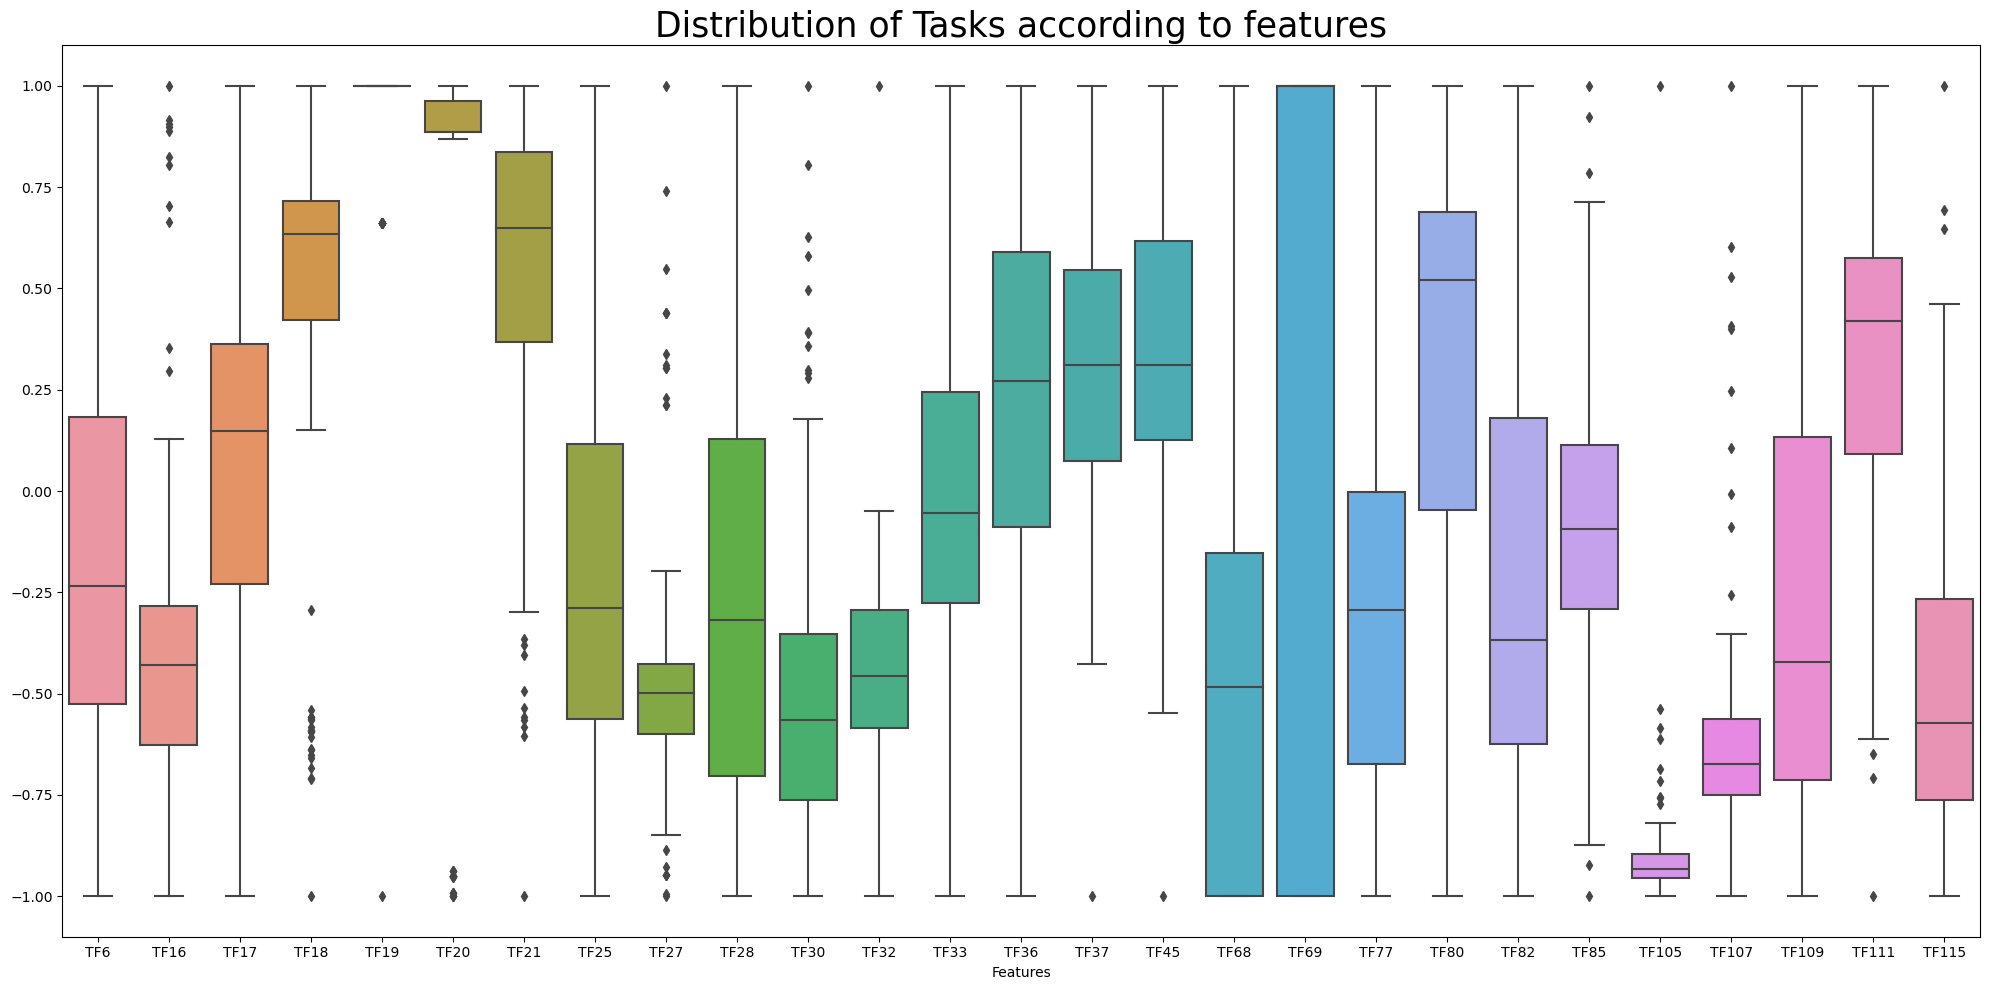

In [49]:
plt.rcParams.update(plt.rcParamsDefault) #Line to reset everything in Matplotlib to default
plt.style.use('tableau-colorblind10') 
plt.figure(figsize=(20,10)) 
fig1=sns.boxplot(data=tasks2) 
fig1.set(xlabel='Features') 
fig1.axes.set_title('Distribution of Tasks according to features',fontsize=25)

plt.tight_layout() 
plt.savefig("./Figures/2.1.2_Feature_Dist_Box.png")
plt.show() 

### Interactive version of boxplot 

In [50]:
#Plotting the interactive graph
import plotly.express as px

tasks2_columns=tasks2.columns[1:]
fig1_plotly = px.box(tasks2, y=tasks2_columns,hover_data=['Task ID'],template='seaborn', \
                     title='Distribution of Tasks according to features', \
                     labels={'value':'','variable':'Features'})
fig1_plotly.show()

### Distribution of task feature values by task

In [51]:
#Plotting distributions of tasks2 dataset
col_names = []

for col in tasks2.columns:
    col_names.append(col)

tasks3  = tasks2.melt(id_vars= 'Task ID', value_vars= col_names[1:],\
                      value_name= 'Task Feature Values', var_name = 'Task Feature')

plt.rcParams.update(plt.rcParamsDefault) #Line to reset everything in Matplotlib to default
plt.style.use('tableau-colorblind10') #Style of the plot
plt.figure(figsize=(200,50)) #Figsize of the plot

fig1=sns.boxplot(data=tasks3, x = "Task ID", y = "Task Feature Values",width=0.85,
                 medianprops=dict(color="blue", alpha=0.7),
                 flierprops=dict(markerfacecolor="#707070", marker="d")) #Plotting

for _,s in fig1.spines.items():
    s.set_linewidth(10)
    s.set_color('cyan')

sns.despine(offset=10, trim=True)
ax = fig1.axes  # Plotting axes



# From the axis we get the xticks which are our x label values
categories = ax.get_xticks()
# Putting & Styling lables and title
new_dates = tasks2['Task ID'].dt.strftime('%d/%m/%Y').tolist()  
plt.xticks(categories,new_dates,fontsize=30, rotation=30)

# Adding & Styling lables and title 
plt.xlabel("Task ID",fontsize=100)
plt.ylabel("Task Feature Values",fontsize=100)
plt.title("Distribution of feature values for each Task",fontweight="bold",fontsize=150)
plt.xticks(fontsize=30)
plt.yticks(fontsize=50)

plt.savefig("./Figures/2.1.1_Task_Dist_Box.png")
plt.show() 

## 2.2. Boxplot of the distribution of errors if each supplier is chosen to perform every task

#### Equation 1: 𝐸𝑟𝑟𝑜𝑟(𝑡) = min{ 𝑐(𝑠, 𝑡) | 𝑠 ∈ 𝑆 } − 𝑐(𝑠𝑡′,𝑡),   
#### Equation 2: 𝑆𝑐𝑜𝑟𝑒 =√((∑ 𝐸𝑟𝑟𝑜𝑟(𝑡)^2)/|𝑇|)

In [52]:
# Finding the minimum cost for each task ID as minimum cost is the best cost provided by a supplier
new_costs = costs.groupby('Task ID')['Cost'].min().reset_index()

# Creating a list of all suppliers
supplier_lis = costs['Supplier ID'].unique()

# We are getting exactly 63 values indicating 63 suppliers 
len(supplier_lis)

63

In [53]:
#Calculate the error for every Task ID + Supplier ID combination

error_out = pd.DataFrame({'Task ID' : [], 'Min Cost' : [], 'Supplier' : [], \
                          'Supplier Cost' : [], 'Error' : []})

for tasks in new_costs.itertuples():
    for supplier in supplier_lis:

        taskname = tasks[1]
        mincost = tasks[2]
        supcost = costs[(costs['Supplier ID'] == supplier) & (costs['Task ID'] == taskname)].iloc[0]['Cost']
        errorval = (mincost - supcost)

        error_append= pd.DataFrame([[taskname, mincost, supplier, supcost, errorval]],\
                                   columns=['Task ID', 'Min Cost', 'Supplier', 'Supplier Cost', 'Error'])
        error_out = pd.concat([error_out, error_append])

In [54]:
#Function rmsefunc : Calculate the RMSE for cost of each supplier
#comb: Task ID + Supplier ID combination 

def rmsefunc(comb):
    rmse = np.sqrt(mean_squared_error(comb['Min Cost'], comb['Supplier Cost']))
    return pd.Series(dict(rmse = rmse))

rmseData = error_out.groupby('Supplier').apply(rmsefunc).reset_index()

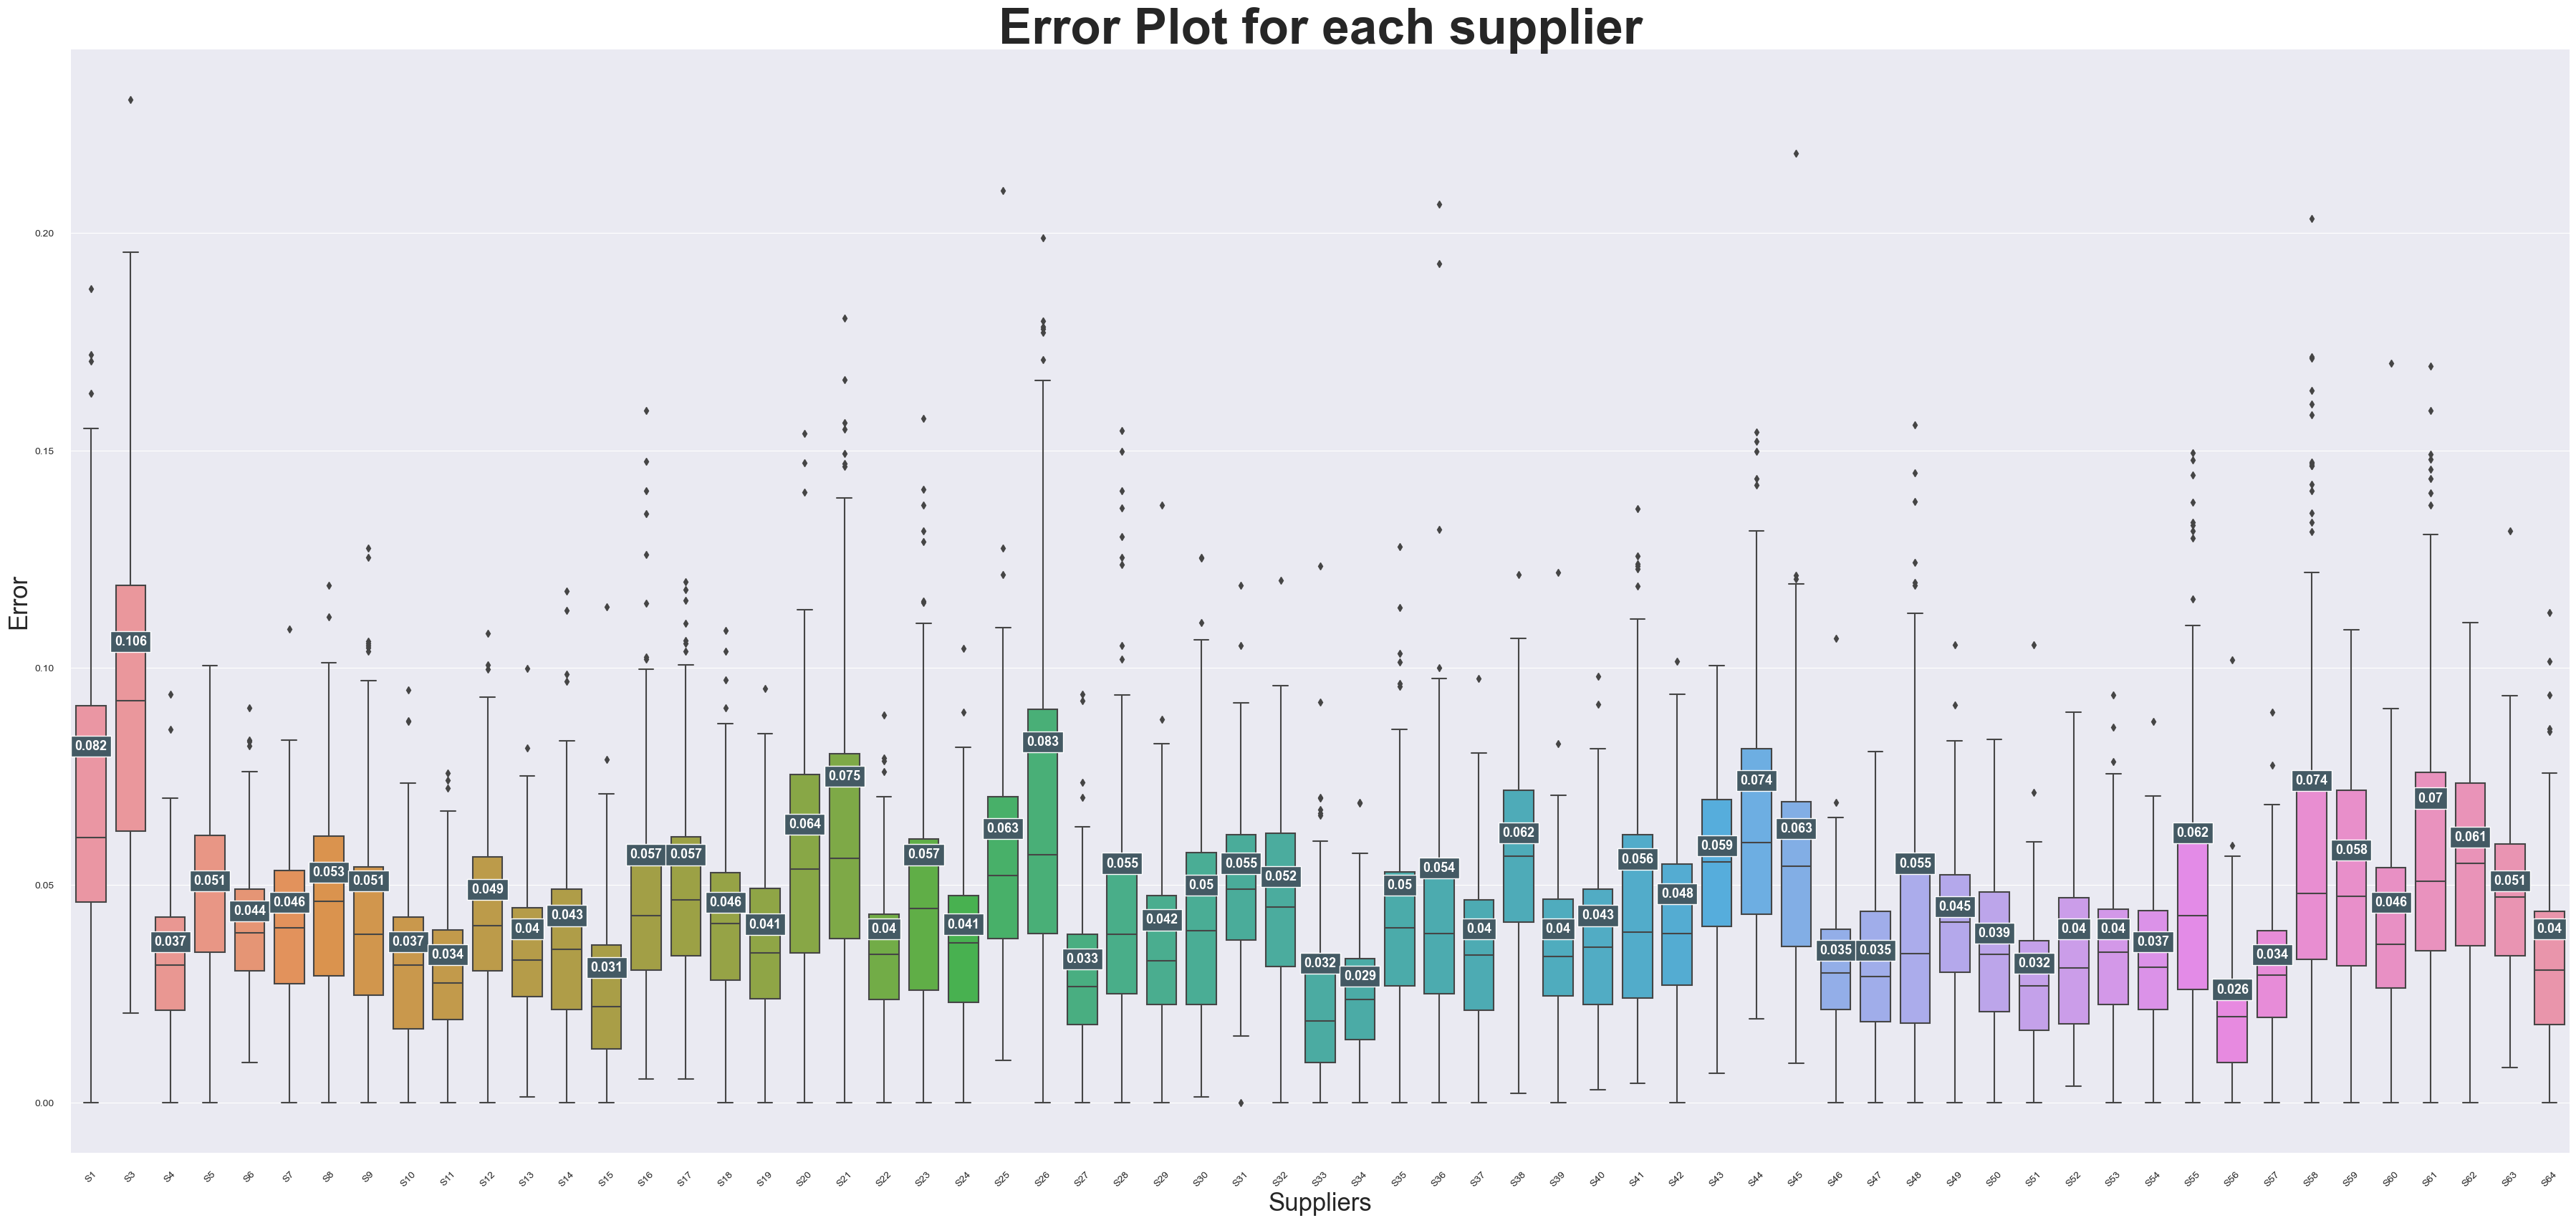

In [55]:
## Boxplot showing distribution of errors for each supplier, if chosen
errorgraph = error_out.copy()
errorgraph['Error'] = errorgraph['Error'].abs()

# Styling the plot
plt.figure(figsize=(45,20))
sns.set_style("darkgrid")

# We plot boxplot with box width as 0.75 to make it less congested
err_plot = sns.boxplot(data=errorgraph, x= 'Supplier', y = 'Error' ,width=0.75)

ax = err_plot.axes  # Plotting axes

# From the axis we get the xticks which are our x label values 
categories = ax.get_xticks()

# For annotating each boxplot with RMSE, we run a for loop through each of the xticks
for cat, supplier in enumerate(supplier_lis):
    
    currentsupplier = supplier
    y = rmseData[rmseData['Supplier'] == supplier].iloc[0]['rmse'] # Setting RMSE based on index
    y = round(y, 3)
    
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=13,
        color='white',
        bbox=dict(facecolor='#445A64'))

sns.despine(offset=10, trim=True)
plt.xticks(rotation = 45)

# Putting & Styling lables and title 
plt.xlabel("Suppliers", fontsize=25)
plt.ylabel("Error", fontsize=25)
plt.title("Error Plot for each supplier",fontweight="bold", fontsize=50)

plt.rc('axes', titlesize=35)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=20)

plt.savefig("./Figures/2.2_Boxplot.png")
plt.show()

In [56]:
error_best = error_out[error_out['Supplier']=='S56']
error_best.reset_index(inplace = True)
rmse_best = sqrt(np.mean((error_best['Error'])**2))

## 2.3. Heatmap Plot showing cost values of tasks (rows) and suppliers (columns)

In [57]:
#Additional modules to install natsort:
import pip
pip.main(['install','natsort', '--quiet'])

import natsort as ns

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [58]:
## As the data frame was initially long format, 
## it is converted to wide format with Task ID as rows and Supplier ID as columns. 

costs_h=costs.pivot_table(values="Cost", index="Task ID", columns="Supplier ID")

In [59]:
costs_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2019-05-30 to 2021-12-22
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S1      120 non-null    float64
 1   S10     120 non-null    float64
 2   S11     120 non-null    float64
 3   S12     120 non-null    float64
 4   S13     120 non-null    float64
 5   S14     120 non-null    float64
 6   S15     120 non-null    float64
 7   S16     120 non-null    float64
 8   S17     120 non-null    float64
 9   S18     120 non-null    float64
 10  S19     120 non-null    float64
 11  S20     120 non-null    float64
 12  S21     120 non-null    float64
 13  S22     120 non-null    float64
 14  S23     120 non-null    float64
 15  S24     120 non-null    float64
 16  S25     120 non-null    float64
 17  S26     120 non-null    float64
 18  S27     120 non-null    float64
 19  S28     120 non-null    float64
 20  S29     120 non-null    float64
 21  S3      120 non-null

In [60]:
## "natsort" module is used to sort the Supplier ID in order, 
## since Supplier ID consisted of both alphabets and numbers. 

costs_h=costs_h.reindex(ns.natsorted(costs_h.columns), axis=1)

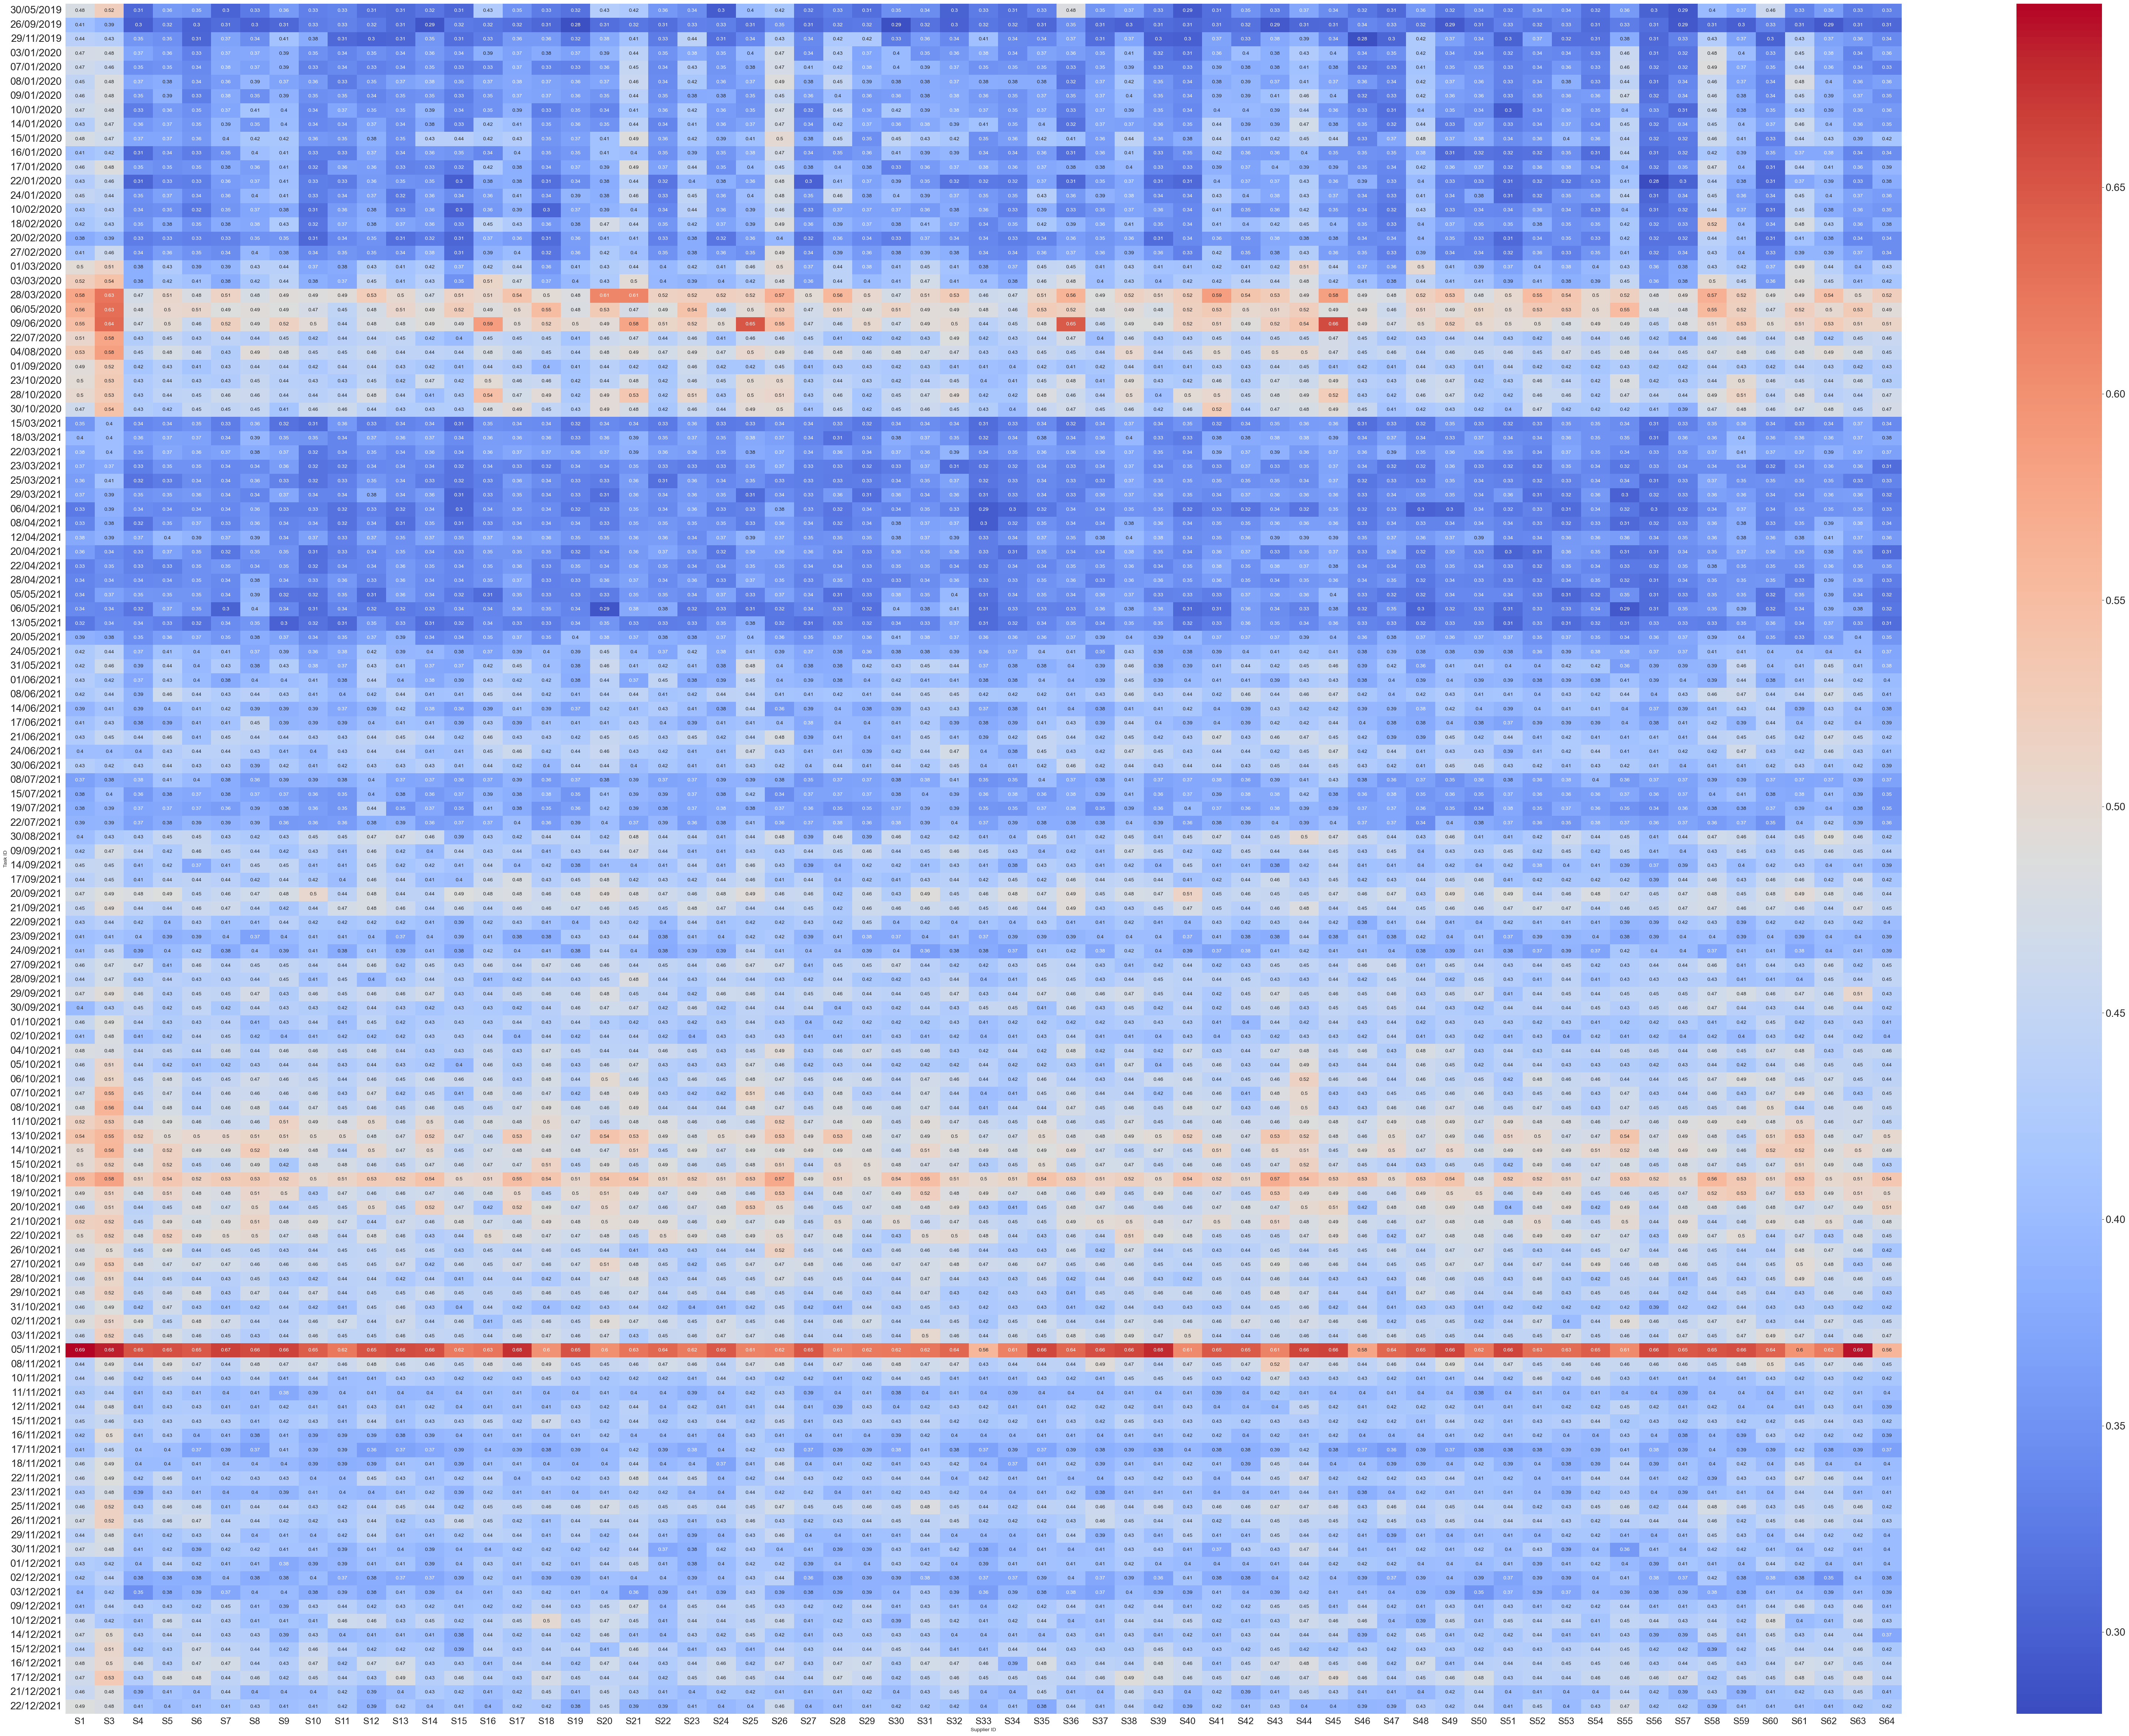

In [61]:
## Seaborn module used to plot heatmap, showing cost of each task quoted by each supplier

pltlib.pyplot.figure(figsize=(80,60))
fig2 = sns.heatmap(costs_h, annot=True, cmap="coolwarm")
ax2 = fig2.axes
cat2 = ax2.get_yticks()
plt.yticks(cat2,new_dates)
plt.savefig("./Figures/2.3.1_Heatmap_Seaborn.png")
plt.show()

In [62]:
# Comparison between suppliers for each Task, Red: Most expensive , Blue: Cheapest

costheat = costs_h.style.format("{:.2}")\
           .background_gradient(cmap='coolwarm',axis=1).format_index('{:%d/%m/%Y}')

costheat

In [63]:
dfi.export(costheat, 'Figures/2.3.2_Heatmap_Dataframe.png', max_cols=-1, max_rows=-1)

# 3. Machine Learning

## 3.1. Combine the task features, supplier features and costs into a single dataset


In [64]:
#Merging datasets together
df_1 = pd.merge(costs, tasks2, how='inner', on='Task ID') 
df = pd.merge(df_1, suppliers,how='inner',on='Supplier ID')  

print('The number of rows in the costs dataframe were: ', str(len(costs)), \
      ' and the number of rows of the new dataframe is: ',str(len(df)))

The number of rows in the costs dataframe were:  7560  and the number of rows of the new dataframe is:  7560


In [65]:
#To order the columns in the same way as required 
cols_to_order = ['Task ID','Supplier ID'] #Columns to be placed at the beginning
cols_to_order2=['Cost'] #Columns to be placed at the end

#To avoid writing everything again and rearrange columns more efficiently
cols=cols_to_order+cols_to_order2
new_columns = cols_to_order + (df.columns.drop(cols).tolist()) + cols_to_order2

df = df[new_columns] #Create the ordered dataframe
df_copy=copy.deepcopy(df) #Before dropping the column of suppliers we create a copy
df

Task ID Supplier ID       TF6      TF16      TF17      TF18      TF19  \
0    2019-05-30          S1 -0.821200 -0.559193 -0.350672 -0.294403  1.000000   
1    2019-09-26          S1 -1.000000  0.017794 -0.560807 -1.000000  0.662732   
2    2019-11-29          S1 -0.183833 -0.424278 -0.642854 -0.659203  0.662732   
3    2020-01-03          S1 -0.174803 -0.435824 -0.627916 -0.636074  0.662732   
4    2020-01-07          S1 -0.417667 -0.353895 -0.624852 -0.709065  0.662732   
...         ...         ...       ...       ...       ...       ...       ...   
7555 2021-12-15         S64 -0.600934 -0.433847  0.458689  0.630753  1.000000   
7556 2021-12-16         S64 -0.418980 -0.372875  0.445513  0.645572  1.000000   
7557 2021-12-17         S64 -0.387297 -0.363068  0.439078  0.636535  1.000000   
7558 2021-12-21         S64 -0.385009 -0.380783  0.494542  0.668410  1.000000   
7559 2021-12-22         S64 -0.253683 -0.507552  0.379247  0.726832  1.000000   

          TF20      TF21      TF25  ...      SF10      SF11      SF12  \
0     0.961792 -0.379070  0.224388  ... -0.632653 -0.052632  0.142857   
1     0.961792 -1.000000  0.297053  ... -0.632653 -0.052632  0.142857   
2    -0.951252 -0.001434  0.446932  ... -0.632653 -0.052632  0.142857   
3     0.886693 -0.017407  0.571802  ... -0.632653 -0.052632  0.142857   
4     0.886693 -0.147246  0.571341  ... -0.632653 -0.052632  0.142857   
...        ...       ...       ...  ...       ...       ...       ...   
7555 -0.951252  0.638747 -0.659695  ...  1.000000 -0.052632  0.142857   
7556 -0.951252  0.653082 -0.600974  ...  1.000000 -0.052632  0.142857   
7557 -0.951252  0.642433 -0.566322  ...  1.000000 -0.052632  0.142857   
7558 -0.951252  0.660455 -0.518683  ...  1.000000 -0.052632  0.142857   
7559 -0.951252  0.701413 -0.537758  ...  1.000000 -0.052632  0.142857   

          SF13      SF14      SF15  SF16   SF17  SF18      Cost  
0    -0.052632 -0.052632 -0.538462   0.2 -0.996   0.5  0.478219  
1    -0.052632 -0.052632 -0.538462   0.2 -0.996   0.5  0.407784  
2    -0.052632 -0.052632 -0.538462   0.2 -0.996   0.5  0.437884  
3    -0.052632 -0.052632 -0.538462   0.2 -0.996   0.5  0.473479  
4    -0.052632 -0.052632 -0.538462   0.2 -0.996   0.5  0.466028  
...        ...       ...       ...   ...    ...   ...       ...  
7555  1.000000 -1.000000 -1.000000  -1.0  1.000   1.0  0.420607  
7556  1.000000 -1.000000 -1.000000  -1.0  1.000   1.0  0.440728  
7557  1.000000 -1.000000 -1.000000  -1.0  1.000   1.0  0.443202  
7558  1.000000 -1.000000 -1.000000  -1.0  1.000   1.0  0.408710  
7559  1.000000 -1.000000 -1.000000  -1.0  1.000   1.0  0.423008  

[7560 rows x 48 columns]

In [66]:
#Splitting the data
x=df.iloc[:,2:-1] #Task features and suppliers features
y=df.iloc[:,-1] #Costs
Groups=df.iloc[:,0] #Task ID

In [67]:
len(Groups.unique())

120

## 3.2 Splitting the Data in X and Y (Train and Test)

In [68]:
import random #At the end we should include this package at the beginning 

random.seed(50) #Set a seed to replicate results
sampletasks=Groups.unique() #Get a list with the unique Tasks (120)
TestGroup = random.sample(list(sampletasks), 20) #Randomly select 20

len(TestGroup)

20

In [69]:
tests=df[df['Task ID'].isin(TestGroup)].sort_values(by='Task ID').reset_index(drop=True) 
#Task ID included in TestGroup

trains=df[~df['Task ID'].isin(TestGroup)].sort_values(by='Task ID').reset_index(drop=True) 
#Task ID NOT included in TestGroup

In [70]:
x_train=trains.iloc[:,2:-1] 
#x train (Tasks and Suppliers features of Tasks ID's that were NOT selected in the TestGroup)

x_test=tests.iloc[:,2:-1] 
#x test (Tasks and Suppliers features of Tasks ID's that were selected in the TestGroup)

y_train=trains.iloc[:,-1] 
#y train (Costs of Tasks ID's that were NOT selected in the TestGroup)

y_test=tests.iloc[:,-1] 
#y test (Costs of Tasks ID's that were selected in the TestGroup)

In [71]:
len(tests['Task ID'].unique())

20

In [72]:
x_train

TF6      TF16      TF17      TF18  TF19      TF20      TF21  \
0    -0.821200 -0.559193 -0.350672 -0.294403   1.0  0.961792 -0.379070   
1    -0.821200 -0.559193 -0.350672 -0.294403   1.0  0.961792 -0.379070   
2    -0.821200 -0.559193 -0.350672 -0.294403   1.0  0.961792 -0.379070   
3    -0.821200 -0.559193 -0.350672 -0.294403   1.0  0.961792 -0.379070   
4    -0.821200 -0.559193 -0.350672 -0.294403   1.0  0.961792 -0.379070   
...        ...       ...       ...       ...   ...       ...       ...   
6295 -0.385009 -0.380783  0.494542  0.668410   1.0 -0.951252  0.660455   
6296 -0.385009 -0.380783  0.494542  0.668410   1.0 -0.951252  0.660455   
6297 -0.385009 -0.380783  0.494542  0.668410   1.0 -0.951252  0.660455   
6298 -0.385009 -0.380783  0.494542  0.668410   1.0 -0.951252  0.660455   
6299 -0.385009 -0.380783  0.494542  0.668410   1.0 -0.951252  0.660455   

          TF25      TF27      TF28  ...       SF9      SF10      SF11  \
0     0.224388 -0.599289 -0.746568  ... -0.052632 -0.632653 -0.052632   
1     0.224388 -0.599289 -0.746568  ... -0.052632 -0.632653 -0.052632   
2     0.224388 -0.599289 -0.746568  ...  1.000000  1.000000 -0.052632   
3     0.224388 -0.599289 -0.746568  ... -0.052632 -1.000000 -0.052632   
4     0.224388 -0.599289 -0.746568  ... -1.000000 -0.632653  1.000000   
...        ...       ...       ...  ...       ...       ...       ...   
6295 -0.518683  0.547029 -0.622863  ... -0.052632 -0.632653  1.000000   
6296 -0.518683  0.547029 -0.622863  ...  1.000000 -1.000000 -1.000000   
6297 -0.518683  0.547029 -0.622863  ...  1.000000 -1.000000 -0.052632   
6298 -0.518683  0.547029 -0.622863  ... -1.000000 -1.000000 -1.000000   
6299 -0.518683  0.547029 -0.622863  ...  1.000000  1.000000 -0.052632   

          SF12      SF13      SF14      SF15  SF16   SF17  SF18  
0     0.142857 -0.052632 -0.052632 -0.538462   0.2 -0.996   0.5  
1     0.142857 -0.052632 -0.052632 -0.538462   0.2 -1.000   0.5  
2     0.142857  1.000000 -1.000000 -1.000000  -1.0  1.000   1.0  
3     0.142857 -1.000000 -1.000000  1.000000   1.0  1.000  -1.0  
4     1.000000  1.000000 -1.000000  1.000000   0.2 -0.400  -1.0  
...        ...       ...       ...       ...   ...    ...   ...  
6295  0.142857 -0.052632 -1.000000 -1.000000  -1.0 -0.700   0.5  
6296 -1.000000 -1.000000  1.000000 -1.000000  -1.0  1.000   1.0  
6297  0.142857 -0.052632  1.000000 -1.000000   0.2  1.000  -1.0  
6298  0.142857 -1.000000 -0.052632  1.000000  -1.0 -0.700   0.5  
6299  0.142857  1.000000 -1.000000 -1.000000  -1.0  1.000   1.0  

[6300 rows x 45 columns]

## 3.3 Training and Testing Model (Lasso Regression & Ridge Regression)

##### 3.3.1 Lasso Model 

In [73]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01, random_state=42, max_iter=10000)
lasso.fit(x_train, y_train)

pred_lasso = lasso.predict(x_test)
pred_lasso

lasso.score(x_test,y_test) #R2 score

0.2728868228826856

##### 3.3.2 Ridge Model 

In [74]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1,random_state=42,max_iter=10000) 
ridge.fit(x_train, y_train)

pred_ridge = ridge.predict(x_test)
pred_ridge

ridge.score(x_test,y_test) #R2 score

0.6497735526825286

##### 3.3.3 Elastic Model

In [75]:
from sklearn.linear_model import ElasticNet

Elnet=ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
Elnet.fit(x_train, y_train)

pred_ElasticNet = Elnet.predict(x_test)
Elnet.score(x_test,y_test) #R2 score

0.4626343948617977

##### 3.4.1 Lasso Model 

(1) Calculate the Error of the trained model for each task in TestGroup and using Equation 1. 

In [76]:
Test_data=copy.deepcopy(tests.iloc[:, [0,1,47]]) #copy the data of test dataset
Test_data['Pred_cost']=pred_lasso 

In [77]:
Test_data

Task ID Supplier ID      Cost  Pred_cost
0    2020-01-16          S1  0.411120   0.390210
1    2020-01-16         S48  0.377193   0.390210
2    2020-01-16         S17  0.399462   0.390210
3    2020-01-16         S49  0.309074   0.390210
4    2020-01-16         S16  0.337264   0.390210
...         ...         ...       ...        ...
1255 2021-12-22         S31  0.421750   0.418099
1256 2021-12-22          S4  0.413782   0.418099
1257 2021-12-22         S48  0.431358   0.418099
1258 2021-12-22         S49  0.421322   0.418099
1259 2021-12-22         S64  0.423008   0.418099

[1260 rows x 4 columns]

In [78]:
len(Test_data['Task ID'].unique())

20

In [79]:
Test_data=Test_data.set_index('Task ID')
Test_data['Min_cost']=Test_data.groupby("Task ID").Cost.agg(min=np.min)  #Min cost by task
Test_data

Supplier ID      Cost  Pred_cost  Min_cost
Task ID                                              
2020-01-16          S1  0.411120   0.390210  0.309074
2020-01-16         S48  0.377193   0.390210  0.309074
2020-01-16         S17  0.399462   0.390210  0.309074
2020-01-16         S49  0.309074   0.390210  0.309074
2020-01-16         S16  0.337264   0.390210  0.309074
...                ...       ...        ...       ...
2021-12-22         S31  0.421750   0.418099  0.377868
2021-12-22          S4  0.413782   0.418099  0.377868
2021-12-22         S48  0.431358   0.418099  0.377868
2021-12-22         S49  0.421322   0.418099  0.377868
2021-12-22         S64  0.423008   0.418099  0.377868

[1260 rows x 4 columns]

In [80]:
#Sort the values by Task ID and Pred_cost in ascending order to get the cheapest pred_cost 
#in order to find the best supplier predicted by machine learning by Task ID

Test_data3=Test_data.sort_values(by=['Task ID','Pred_cost'], ascending=[True, True])
Test_data3=Test_data3.reset_index()

Test_data3['Error']=Test_data3['Min_cost']-Test_data3['Cost']
Test_data3=Test_data3.reset_index()

In [81]:
#Variables to get the first row of each Task ID group
Supplier_Q=len(Test_data3['Supplier ID'].unique())
length_data=len(Test_data3['Task ID'])

Test_data4=Test_data3[0:length_data:Supplier_Q]
Test_data4=Test_data4.iloc[:,1:]
Test_data4

Task ID Supplier ID      Cost  Pred_cost  Min_cost     Error
0    2020-01-16          S1  0.411120   0.390210  0.309074 -0.102046
63   2020-03-03         S33  0.404604   0.384666  0.350738 -0.053866
126  2020-10-30         S56  0.411498   0.422696  0.388173 -0.023325
189  2021-03-22         S19  0.363016   0.404554  0.321541 -0.041474
252  2021-03-29          S3  0.385688   0.403449  0.300676 -0.085011
315  2021-04-28         S25  0.373955   0.400656  0.313595 -0.060360
378  2021-05-06         S42  0.361783   0.398833  0.288931 -0.072852
441  2021-05-20         S26  0.359672   0.407989  0.333052 -0.026620
504  2021-05-31         S29  0.417547   0.420327  0.358073 -0.059474
567  2021-09-14         S32  0.429985   0.416433  0.365667 -0.064318
630  2021-09-21          S5  0.442972   0.420972  0.419387 -0.023585
693  2021-09-28         S22  0.435937   0.424019  0.396764 -0.039173
756  2021-10-01         S42  0.397064   0.423554  0.397064  0.000000
819  2021-10-15         S49  0.449514   0.429451  0.416431 -0.033083
882  2021-10-22         S41  0.449481   0.429316  0.421872 -0.027609
945  2021-10-27         S58  0.448928   0.432607  0.419289 -0.029639
1008 2021-11-12         S54  0.416210   0.424287  0.393463 -0.022747
1071 2021-12-01         S28  0.404496   0.423056  0.375877 -0.028619
1134 2021-12-14         S61  0.425816   0.422299  0.374692 -0.051124
1197 2021-12-22         S23  0.407867   0.418099  0.377868 -0.029999

(2) Calculate the RMSE score

In [82]:
Test_data4['Error_Squared']=Test_data4['Error']**2
mse=np.sum(Test_data4['Error_Squared'])/len(Test_data4['Task ID'].unique())

In [83]:
rmse3_lasso=np.sqrt(mse)
print(rmse3_lasso)

0.049907607786402734


##### 3.4.2 Ridge model 

In [84]:
Test_dataRidge=copy.deepcopy(tests.iloc[:, [0,1,47]]) #copy the data of test dataset
Test_dataRidge['Pred_cost']=pred_ridge #include the prediction result 
len(Test_dataRidge['Task ID'].unique())

20

In [85]:
Test_dataRidge=Test_dataRidge.set_index('Task ID')
Test_dataRidge['Min_cost']=Test_dataRidge.groupby("Task ID").Cost.agg(min=np.min)  #Min cost by task
Test_dataRidge

Supplier ID      Cost  Pred_cost  Min_cost
Task ID                                              
2020-01-16          S1  0.411120   0.373348  0.309074
2020-01-16         S48  0.377193   0.371907  0.309074
2020-01-16         S17  0.399462   0.383948  0.309074
2020-01-16         S49  0.309074   0.369088  0.309074
2020-01-16         S16  0.337264   0.383166  0.309074
...                ...       ...        ...       ...
2021-12-22         S31  0.421750   0.433252  0.377868
2021-12-22          S4  0.413782   0.426686  0.377868
2021-12-22         S48  0.431358   0.426179  0.377868
2021-12-22         S49  0.421322   0.423360  0.377868
2021-12-22         S64  0.423008   0.421113  0.377868

[1260 rows x 4 columns]

In [86]:
Test_dataRidge3=Test_dataRidge.sort_values(by=['Task ID','Pred_cost'], ascending=[True, True])
Test_dataRidge3=Test_dataRidge3.reset_index()

Test_dataRidge3['Error']=Test_dataRidge3['Min_cost']-Test_dataRidge3['Cost']
Test_dataRidge3=Test_dataRidge3.reset_index()

#Sort the values by Task ID and Pred_cost in ascending order to get the cheapest pred_cost 
#in order to find the best supplier predicted by machine learning by Task ID

Supplier_QRidge=len(Test_dataRidge3['Supplier ID'].unique())
length_data=len(Test_dataRidge3['Task ID'])

Test_dataRidge4=Test_dataRidge3[0:length_data:Supplier_QRidge]
Test_dataRidge4=Test_dataRidge4.iloc[:,1:]
Test_dataRidge4

Task ID Supplier ID      Cost  Pred_cost  Min_cost     Error
0    2020-01-16         S39  0.329161   0.354391  0.309074 -0.020087
63   2020-03-03         S39  0.402641   0.355428  0.350738 -0.051904
126  2020-10-30         S39  0.424665   0.427574  0.388173 -0.036492
189  2021-03-22         S39  0.346083   0.326895  0.321541 -0.024541
252  2021-03-29         S39  0.356513   0.346902  0.300676 -0.055837
315  2021-04-28         S39  0.359524   0.332656  0.313595 -0.045929
378  2021-05-06         S39  0.359673   0.308742  0.288931 -0.070743
441  2021-05-20         S39  0.385325   0.347241  0.333052 -0.052273
504  2021-05-31         S39  0.380944   0.397727  0.358073 -0.022871
567  2021-09-14         S39  0.396566   0.430619  0.365667 -0.030899
630  2021-09-21         S39  0.449464   0.426294  0.419387 -0.030077
693  2021-09-28         S39  0.445416   0.416521  0.396764 -0.048652
756  2021-10-01         S39  0.432532   0.435084  0.397064 -0.035467
819  2021-10-15         S39  0.447382   0.453146  0.416431 -0.030951
882  2021-10-22         S39  0.486907   0.446141  0.421872 -0.065035
945  2021-10-27         S39  0.445483   0.441989  0.419289 -0.026194
1008 2021-11-12         S39  0.410363   0.387828  0.393463 -0.016900
1071 2021-12-01         S39  0.403838   0.387715  0.375877 -0.027960
1134 2021-12-14         S39  0.407399   0.423990  0.374692 -0.032706
1197 2021-12-22         S39  0.415940   0.408663  0.377868 -0.038072

In [87]:
Test_dataRidge4['Error_Squared']=Test_dataRidge4['Error']**2
mse=np.sum(Test_dataRidge4['Error_Squared'])/len(Test_dataRidge4['Task ID'].unique())

rmse3_ridge=np.sqrt(mse)
print(rmse3_ridge)

0.0409043084265918


##### 3.4.3 Elastic model

In [88]:
Test_dataElasticNet=copy.deepcopy(tests.iloc[:, [0,1,47]]) #copy the data of test dataset
Test_dataElasticNet['Pred_cost']=pred_ElasticNet #include the prediction result 
len(Test_dataElasticNet['Task ID'].unique())

20

In [89]:
Test_dataElasticNet=Test_dataElasticNet.set_index('Task ID')
Test_dataElasticNet['Min_cost']=Test_dataElasticNet.groupby("Task ID").Cost.agg(min=np.min)  #Min cost by task
Test_dataElasticNet

Supplier ID      Cost  Pred_cost  Min_cost
Task ID                                              
2020-01-16          S1  0.411120   0.368760  0.309074
2020-01-16         S48  0.377193   0.368343  0.309074
2020-01-16         S17  0.399462   0.370615  0.309074
2020-01-16         S49  0.309074   0.368343  0.309074
2020-01-16         S16  0.337264   0.370615  0.309074
...                ...       ...        ...       ...
2021-12-22         S31  0.421750   0.410608  0.377868
2021-12-22          S4  0.413782   0.410608  0.377868
2021-12-22         S48  0.431358   0.410191  0.377868
2021-12-22         S49  0.421322   0.410191  0.377868
2021-12-22         S64  0.423008   0.412462  0.377868

[1260 rows x 4 columns]

In [90]:
Test_dataElasticNet3=Test_dataElasticNet.sort_values(by=['Task ID','Pred_cost'], ascending=[True, True])
Test_dataElasticNet3=Test_dataElasticNet3.reset_index()

Test_dataElasticNet3['Error']=Test_dataElasticNet3['Min_cost']-Test_dataElasticNet3['Cost']
Test_dataElasticNet3=Test_dataElasticNet3.reset_index()

#Sort the values by Task ID and Pred_cost in ascending order to get the cheapest pred_cost 
#in order to find the best supplier predicted by machine learning by Task ID

Supplier_QRidge=len(Test_dataElasticNet3['Supplier ID'].unique())
length_data=len(Test_dataElasticNet3['Task ID'])

Test_dataElasticNet4=Test_dataElasticNet3[0:length_data:Supplier_QRidge]
Test_dataElasticNet4=Test_dataElasticNet4.iloc[:,1:]
Test_dataElasticNet4

Task ID Supplier ID      Cost  Pred_cost  Min_cost     Error
0    2020-01-16         S48  0.377193   0.368343  0.309074 -0.068119
63   2020-03-03         S33  0.404604   0.357429  0.350738 -0.053866
126  2020-10-30         S56  0.411498   0.430300  0.388173 -0.023325
189  2021-03-22         S19  0.363016   0.386804  0.321541 -0.041474
252  2021-03-29         S49  0.349185   0.384887  0.300676 -0.048509
315  2021-04-28         S29  0.330813   0.379616  0.313595 -0.017219
378  2021-05-06          S7  0.302261   0.376430  0.288931 -0.013330
441  2021-05-20         S27  0.349233   0.395271  0.333052 -0.016181
504  2021-05-31         S29  0.417547   0.422681  0.358073 -0.059474
567  2021-09-14         S56  0.365667   0.414778  0.365667  0.000000
630  2021-09-21         S48  0.445781   0.424596  0.419387 -0.026393
693  2021-09-28          S9  0.453824   0.429366  0.396764 -0.057060
756  2021-10-01         S13  0.418590   0.428420  0.397064 -0.021525
819  2021-10-15         S49  0.449514   0.439807  0.416431 -0.033083
882  2021-10-22         S29  0.440674   0.438656  0.421872 -0.018802
945  2021-10-27         S50  0.470873   0.447866  0.419289 -0.051584
1008 2021-11-12         S54  0.416210   0.429763  0.393463 -0.022747
1071 2021-12-01         S40  0.398837   0.421140  0.375877 -0.022960
1134 2021-12-14          S6  0.443407   0.418743  0.374692 -0.068714
1197 2021-12-22         S23  0.407867   0.410191  0.377868 -0.029999

In [91]:
Test_dataElasticNet4['Error_Squared']=Test_dataElasticNet4['Error']**2
mse=np.sum(Test_dataElasticNet4['Error_Squared'])/len(Test_dataElasticNet4['Task ID'].unique())

rmse3_ElasticNet=np.sqrt(mse)
print(rmse3_ElasticNet) 

0.039763753646178596


##### 3.5 Comparison of Error and RMSE

#### Comparison between error values obtained from section 2.2 and section 3.4 (predictive models)

In [92]:
error_out.reset_index(inplace=True)  ## Dataframe obtained from Section 2.2
error_out = error_out.drop(['index'], axis=1)

In [93]:
"""
The function print_error_2_2 fetches the error obtained in Section 2.2 
based on Task ID and Supplier in the predictive model.
Hence, it helps in comparing the Error values obtained manually versus the predictive model. 

"""

def print_error_2_2(df):  

    Error_22 = []

    for i in df.index:
        for j in range(len(error_out)):
            if (df['Task ID'][i] == error_out['Task ID'][j] ) \
            and (df['Supplier ID'][i] == error_out['Supplier'][j]):
                Error_22.append(error_out['Error'][j])

    #print(Error_22)
    
    df['Error 2.2'] = Error_22


In [94]:
print_error_2_2(Test_data4)  ## Adding corresponding Error value from Section 2.2 
                             ## into the dataframe obtained after Lasso Regression
Test_data4

Task ID Supplier ID      Cost  Pred_cost  Min_cost     Error  \
0    2020-01-16          S1  0.411120   0.390210  0.309074 -0.102046   
63   2020-03-03         S33  0.404604   0.384666  0.350738 -0.053866   
126  2020-10-30         S56  0.411498   0.422696  0.388173 -0.023325   
189  2021-03-22         S19  0.363016   0.404554  0.321541 -0.041474   
252  2021-03-29          S3  0.385688   0.403449  0.300676 -0.085011   
315  2021-04-28         S25  0.373955   0.400656  0.313595 -0.060360   
378  2021-05-06         S42  0.361783   0.398833  0.288931 -0.072852   
441  2021-05-20         S26  0.359672   0.407989  0.333052 -0.026620   
504  2021-05-31         S29  0.417547   0.420327  0.358073 -0.059474   
567  2021-09-14         S32  0.429985   0.416433  0.365667 -0.064318   
630  2021-09-21          S5  0.442972   0.420972  0.419387 -0.023585   
693  2021-09-28         S22  0.435937   0.424019  0.396764 -0.039173   
756  2021-10-01         S42  0.397064   0.423554  0.397064  0.000000   
819  2021-10-15         S49  0.449514   0.429451  0.416431 -0.033083   
882  2021-10-22         S41  0.449481   0.429316  0.421872 -0.027609   
945  2021-10-27         S58  0.448928   0.432607  0.419289 -0.029639   
1008 2021-11-12         S54  0.416210   0.424287  0.393463 -0.022747   
1071 2021-12-01         S28  0.404496   0.423056  0.375877 -0.028619   
1134 2021-12-14         S61  0.425816   0.422299  0.374692 -0.051124   
1197 2021-12-22         S23  0.407867   0.418099  0.377868 -0.029999   

      Error_Squared  Error 2.2  
0          0.010413  -0.102046  
63         0.002902  -0.053866  
126        0.000544  -0.023325  
189        0.001720  -0.041474  
252        0.007227  -0.085011  
315        0.003643  -0.060360  
378        0.005307  -0.072852  
441        0.000709  -0.026620  
504        0.003537  -0.059474  
567        0.004137  -0.064318  
630        0.000556  -0.023585  
693        0.001535  -0.039173  
756        0.000000   0.000000  
819        0.001094  -0.033083  
882        0.000762  -0.027609  
945        0.000878  -0.029639  
1008       0.000517  -0.022747  
1071       0.000819  -0.028619  
1134       0.002614  -0.051124  
1197       0.000900  -0.029999

In [95]:
print_error_2_2(Test_dataRidge4) ## Adding corresponding Error value from Section 2.2 
                                ## into the dataframe obtained after Ridge Regression
Test_dataRidge4

Task ID Supplier ID      Cost  Pred_cost  Min_cost     Error  \
0    2020-01-16         S39  0.329161   0.354391  0.309074 -0.020087   
63   2020-03-03         S39  0.402641   0.355428  0.350738 -0.051904   
126  2020-10-30         S39  0.424665   0.427574  0.388173 -0.036492   
189  2021-03-22         S39  0.346083   0.326895  0.321541 -0.024541   
252  2021-03-29         S39  0.356513   0.346902  0.300676 -0.055837   
315  2021-04-28         S39  0.359524   0.332656  0.313595 -0.045929   
378  2021-05-06         S39  0.359673   0.308742  0.288931 -0.070743   
441  2021-05-20         S39  0.385325   0.347241  0.333052 -0.052273   
504  2021-05-31         S39  0.380944   0.397727  0.358073 -0.022871   
567  2021-09-14         S39  0.396566   0.430619  0.365667 -0.030899   
630  2021-09-21         S39  0.449464   0.426294  0.419387 -0.030077   
693  2021-09-28         S39  0.445416   0.416521  0.396764 -0.048652   
756  2021-10-01         S39  0.432532   0.435084  0.397064 -0.035467   
819  2021-10-15         S39  0.447382   0.453146  0.416431 -0.030951   
882  2021-10-22         S39  0.486907   0.446141  0.421872 -0.065035   
945  2021-10-27         S39  0.445483   0.441989  0.419289 -0.026194   
1008 2021-11-12         S39  0.410363   0.387828  0.393463 -0.016900   
1071 2021-12-01         S39  0.403838   0.387715  0.375877 -0.027960   
1134 2021-12-14         S39  0.407399   0.423990  0.374692 -0.032706   
1197 2021-12-22         S39  0.415940   0.408663  0.377868 -0.038072   

      Error_Squared  Error 2.2  
0          0.000403  -0.020087  
63         0.002694  -0.051904  
126        0.001332  -0.036492  
189        0.000602  -0.024541  
252        0.003118  -0.055837  
315        0.002109  -0.045929  
378        0.005005  -0.070743  
441        0.002732  -0.052273  
504        0.000523  -0.022871  
567        0.000955  -0.030899  
630        0.000905  -0.030077  
693        0.002367  -0.048652  
756        0.001258  -0.035467  
819        0.000958  -0.030951  
882        0.004230  -0.065035  
945        0.000686  -0.026194  
1008       0.000286  -0.016900  
1071       0.000782  -0.027960  
1134       0.001070  -0.032706  
1197       0.001449  -0.038072

In [96]:
sp_lasso=Test_data4['Supplier ID']
t_id_lasso= Test_data4['Task ID']

sp_ridge=Test_dataRidge4['Supplier ID']
t_id_ridge= Test_dataRidge4['Task ID']

In [97]:
rmseData.set_index('Supplier', inplace=True)
rmseData_t=rmseData.T

In [98]:
rmseData_t

Supplier        S1      S10       S11       S12       S13       S14       S15  \
rmse      0.081803  0.03746  0.033735  0.048724  0.039545  0.043363  0.031017   

Supplier       S16      S17       S18  ...       S59        S6       S60  \
rmse      0.056555  0.05666  0.045971  ...  0.058203  0.043668  0.046231   

Supplier       S61       S62       S63       S64        S7       S8       S9  
rmse      0.069556  0.060664  0.050874  0.040125  0.045649  0.05346  0.05115  

[1 rows x 63 columns]

In [99]:
r_col=rmseData_t.columns

index_lasso=r_col[r_col.isin(sp_lasso)]
index_ridge=r_col[r_col.isin(sp_ridge)]

In [100]:
rmse_lasso=pd.DataFrame(np.array([rmse_best]), columns=['Manual approach (2.2)'])
rmse_lasso['Initial ML']=rmse3_lasso

rmse_lasso


Manual approach (2.2)  Initial ML
0               0.025594    0.049908

In [101]:
rmse_ridge=pd.DataFrame(np.array([rmse_best]), columns=['Manual approach (2.2)'])
rmse_ridge['Initial ML']=rmse3_ridge

rmse_ridge

Manual approach (2.2)  Initial ML
0               0.025594    0.040904

In [102]:
rmse_elastic=pd.DataFrame(np.array([rmse_best]), columns=['Manual approach (2.2)'])
rmse_elastic['Initial ML']=rmse3_ElasticNet

rmse_elastic

Manual approach (2.2)  Initial ML
0               0.025594    0.039764

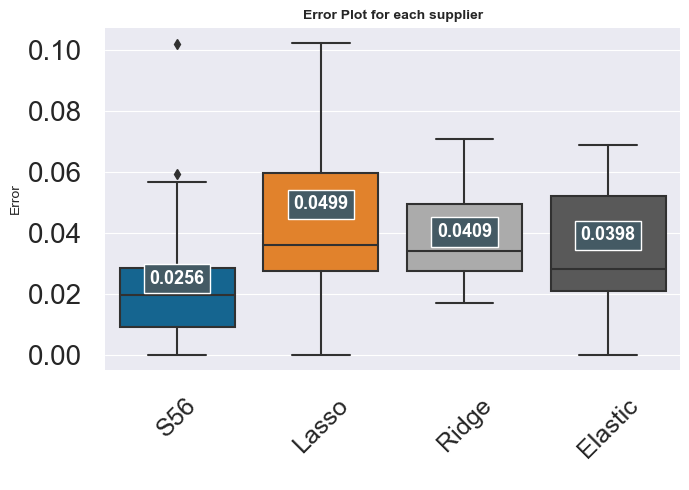

In [103]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(7,5))


# Pandas dataframe
# data1 = pd.DataFrame({"2.2":abs(error_best['Error']) , "Lasso": abs(Test_data4['Error']),"Lasso_hyper": abs(Test_data_hyperlasso_4['Error'])})
data1 = pd.DataFrame({"S56":abs(error_best['Error']) ,  "Lasso": abs(Test_data4['Error']), "Ridge": abs(Test_dataRidge4['Error']),"Elastic": abs(Test_dataElasticNet4['Error'])})
# Plot the dataframe
#ax = data[['Box1', 'Box2']].plot(kind='box', title='boxplot',figsize=(10, 6))
ax = sns.boxplot(data = data1)
ax1 = ax.axes
categories = ax1.get_xticks()
rmse_lis = [rmse_best,rmse3_lasso,rmse3_ridge,rmse3_ElasticNet]
for cat in categories:

    y = rmse_lis[cat]
    y = round(y,4)
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center_baseline', 
        fontweight='bold', 
        size=13,
        color='white',
        bbox=dict(facecolor='#445A64'))
sns.despine(offset=10, trim=True)
plt.xticks(rotation = 45)

 

# Putting & Styling lables and title 
plt.xlabel(" ", fontsize=10)
plt.ylabel("Error", fontsize=10)
plt.title("Error Plot for each supplier",fontweight="bold", fontsize=10)

 

plt.rc('axes', titlesize=35)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=20)

 

# Display the plot
plt.show()

### Section 4 Cross Validation

##### 4.1. Lasso Model

In [104]:
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.metrics import make_scorer
import os

logo=LeaveOneGroupOut()
train_Groups=trains['Task ID']
logo.get_n_splits(x,y,train_Groups)
logo.get_n_splits(groups=train_Groups)

100

In [105]:
len(train_Groups)

6300

In [106]:
#check number of cores
n_cpu=os.cpu_count()
print(n_cpu)

12


In [107]:
def error_2(y_true,y_pred):
    selected=y_true.iloc[np.argmin(y_pred)] 
    #We select the real cost of the supplier recommended by the model (the cheapest one)
    minimal=np.min(y_true)  
    # We select the minimal value for each task
    error=minimal-selected 
    #Finally we applied equation1 (the minimal cost - the cost if we select what the model suggest)
    return(error)

In [108]:
BeePy_scorer = make_scorer(error_2)
scores_lasso = cross_val_score(lasso, x_train, y_train, scoring = BeePy_scorer, \
                               cv=logo, groups=train_Groups, n_jobs=-1)
#Or we can just set as -1 : -1 is for using all the CPU cores available.

In [109]:
print(scores_lasso)

[-0.18725151 -0.01053424 -0.04199341 -0.08907864 -0.14006245 -0.06854663
 -0.09172197 -0.05704143 -0.0831741  -0.04564799 -0.04689694 -0.04638842
 -0.1275013  -0.03788591 -0.03258705 -0.13347771 -0.0769804  -0.14490554
 -0.08215667 -0.04165564 -0.05430568 -0.05086344 -0.15705803 -0.05358418
 -0.03071313 -0.13054213 -0.04165503 -0.06312743 -0.0269193  -0.06139516
 -0.04532858 -0.05152731 -0.01706882 -0.04167894 -0.03197417 -0.03098487
 -0.05331137 -0.04892826 -0.00723247 -0.04867014 -0.03615434 -0.03678824
 -0.03658029 -0.08976618 -0.01548887 -0.01690435 -0.03280915 -0.0188117
 -0.0474281  -0.0117361  -0.01667366  0.         -0.07025173  0.
 -0.03044211 -0.0217372  -0.00955968 -0.04643433 -0.04288669 -0.01487755
 -0.01658994 -0.03634717 -0.02561792 -0.05138669 -0.05072213 -0.0045189
 -0.04237902 -0.04900718 -0.0964572  -0.06866564 -0.02848035 -0.05253578
 -0.04650768 -0.01054391 -0.02615842 -0.02703944 -0.0406264  -0.03394024
 -0.06357509 -0.03383647 -0.02368416 -0.01347242 -0.02372704 

In [110]:
data_ = {'cross_val': scores_lasso}

In [111]:
val_score = pd.DataFrame(data_)

In [112]:
val_score = abs(val_score)

In [113]:
val_score['cross_val']

0     0.187252
1     0.010534
2     0.041993
3     0.089079
4     0.140062
        ...   
95    0.018053
96    0.000000
97    0.032518
98    0.048239
99    0.001869
Name: cross_val, Length: 100, dtype: float64

In [114]:
#rmse calculation
error=np.power(scores_lasso,2)
mse=np.sum(error)/len(scores_lasso)
rmse4_lasso=np.sqrt(mse)
rmse4_lasso

0.057875123947940504

In [115]:
rmse_lasso['Cross Val']= rmse4_lasso
rmse_lasso

Manual approach (2.2)  Initial ML  Cross Val
0               0.025594    0.049908   0.057875

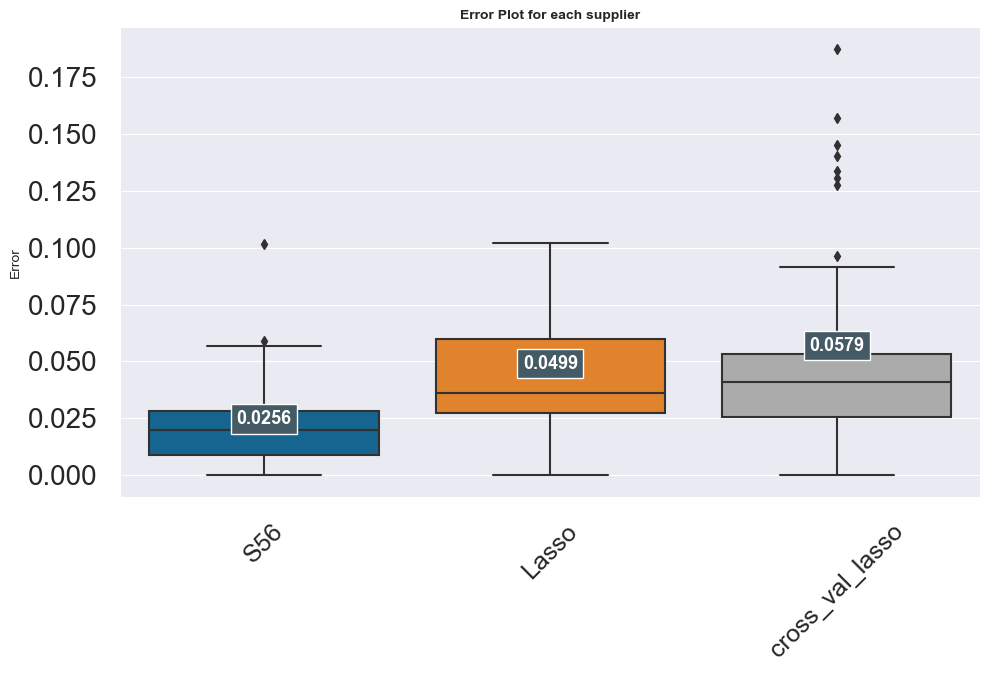

In [116]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(10,7))


# Pandas dataframe
# data1 = pd.DataFrame({"2.2":abs(error_best['Error']) , "Lasso": abs(Test_data4['Error']),"Lasso_hyper": abs(Test_data_hyperlasso_4['Error'])})
data1 = pd.DataFrame({"S56":abs(error_best['Error']) ,  "Lasso": abs(Test_data4['Error']),"cross_val_lasso":val_score['cross_val']})
# Plot the dataframe
#ax = data[['Box1', 'Box2']].plot(kind='box', title='boxplot',figsize=(10, 6))
ax = sns.boxplot(data = data1)
ax1 = ax.axes
categories = ax1.get_xticks()
rmse_lis = [rmse_best,rmse3_lasso,rmse4_lasso]
for cat in categories:

    y = rmse_lis[cat]
    y = round(y,4)
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center_baseline', 
        fontweight='bold', 
        size=13,
        color='white',
        bbox=dict(facecolor='#445A64'))
sns.despine(offset=10, trim=True)
plt.xticks(rotation = 45)

 

# Putting & Styling lables and title 
plt.xlabel(" ", fontsize=10)
plt.ylabel("Error", fontsize=10)
plt.title("Error Plot for each supplier",fontweight="bold", fontsize=10)

 

plt.rc('axes', titlesize=35)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=20)

 

# Display the plot
plt.show()

##### 4.2 Ridge Model 

In [117]:
scores_ridge = cross_val_score(ridge, x_train, y_train, \
                               scoring = BeePy_scorer, cv=logo, \
                               groups=train_Groups, n_jobs=10)

In [118]:
print(scores_ridge)

[-0.03726871 -0.02878258 -0.01643873 -0.01171276 -0.01317335 -0.04328789
 -0.03119965 -0.05818814 -0.0418232  -0.03909421 -0.0246229  -0.03323941
 -0.02974532 -0.05702775 -0.02577738 -0.00648026 -0.04670597 -0.05645031
 -0.04367703 -0.03170122 -0.04701991 -0.02989899 -0.01196966 -0.01194671
 -0.02463263  0.         -0.03046253 -0.02534907 -0.02776225 -0.03711087
 -0.05230152 -0.06360599 -0.04797595 -0.04411201 -0.02111751 -0.02770073
 -0.04586471 -0.03121113 -0.02164018 -0.0368345  -0.05518855 -0.0342606
 -0.03197956 -0.0628206  -0.03666254 -0.02020824 -0.01864217 -0.02795664
 -0.0474281  -0.02375969 -0.04823423 -0.05326283 -0.05553566 -0.02257817
 -0.03654025 -0.03396842 -0.01106246 -0.03507121 -0.01820072 -0.0080816
 -0.00029611 -0.00596082 -0.04345176 -0.01256891 -0.03699796 -0.0016011
 -0.04774845 -0.02608691 -0.0302412  -0.05287975 -0.0593398  -0.044252
 -0.02395396 -0.0189077  -0.04986071 -0.04469172 -0.06187955 -0.03778948
 -0.12197927 -0.01225178 -0.04071665 -0.02451432 -0.0161

In [119]:
quadraticerror=np.sum(np.power(scores_ridge,2))
quadraticerror_2=quadraticerror/len(scores_ridge)
rmse4_ridge=np.sqrt(quadraticerror_2)
rmse4_ridge

0.03996679999798722

In [120]:
rmse_ridge['Cross Val']=rmse4_ridge
rmse_ridge

Manual approach (2.2)  Initial ML  Cross Val
0               0.025594    0.040904   0.039967

##### 4.3 Elastic Model 

In [121]:
scores_elastic = cross_val_score(Elnet, x_train, y_train, \
                               scoring = BeePy_scorer, cv=logo, \
                               groups=train_Groups, n_jobs=10)
print(scores_elastic)

[-0.03726871 -0.02878258 -0.08330405 -0.06668992 -0.03552727 -0.05701752
 -0.06050792 -0.05704143 -0.0106066  -0.04564799 -0.07059047 -0.06330168
 -0.07355627 -0.03788591 -0.03258705 -0.00648026 -0.02859005 -0.14490554
 -0.01885473 -0.04165564 -0.0629175  -0.02990412 -0.00953854 -0.0346138
 -0.06197956  0.         -0.04165503 -0.06312743 -0.0269193  -0.0354375
  0.         -0.03776391 -0.01706882 -0.01667406 -0.02986052 -0.03098487
 -0.03326473 -0.04892826 -0.00723247 -0.04867014 -0.02285816 -0.00885152
 -0.06457053 -0.01075831 -0.04570828 -0.02047689 -0.03280915 -0.0188117
 -0.0474281  -0.0117361  -0.04823423  0.         -0.04317472 -0.0152737
 -0.03044211 -0.0217372  -0.00955968 -0.03507121 -0.04288669 -0.02952574
 -0.01658994 -0.06348187 -0.02561792 -0.05138669 -0.05032862 -0.0016011
 -0.02594717 -0.04324686 -0.06503358 -0.06866564 -0.02848035 -0.0299291
 -0.05765789 -0.01883306 -0.03724105 -0.02488702 -0.0508111  -0.02881438
 -0.06357509 -0.03019672 -0.03324405 -0.01347242  0.     

In [122]:
quadraticerror=np.sum(np.power(scores_elastic,2))
quadraticerror_2=quadraticerror/len(scores_elastic)
rmse4_elastic=np.sqrt(quadraticerror_2)
rmse4_elastic

0.04225220602235697

In [123]:
rmse_elastic['Cross Val']=rmse4_elastic
rmse_elastic

Manual approach (2.2)  Initial ML  Cross Val
0               0.025594    0.039764   0.042252

### Section 5. Hyper-parameter optimiztion

##### 5.1 Lasso Model

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
# param_grid = {"alpha":[1e-6, 1e-5,1e-4, 1e-3,1e-2,1e-1, 1,10]}

alphas = np.linspace (0.1, 0.0001, 100)
param_grid={"alpha": alphas}

# alphas = np.linspace (0, 1, 100)
# param_grid={"alpha": alphas}
# alphas = np.logspace(-4, -0.5, 30)

# bottom line limit 0.001, when alpha becomes 0 -> model closer to linear regression ->thus,choosing the smallest alpha (1e-08)

grid_search = GridSearchCV(lasso, param_grid, scoring=BeePy_scorer, cv=logo, n_jobs = -1)
grid_search.fit(x_train, y_train, groups=train_Groups)

GridSearchCV(cv=LeaveOneGroupOut(),
             estimator=Lasso(alpha=0.01, max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.09899091, 0.09798182, 0.09697273, 0.09596364,
       0.09495455, 0.09394545, 0.09293636, 0.09192727, 0.09091818,
       0.08990909, 0.0889    , 0.08789091, 0.08688182, 0.08587273,
       0.08486364, 0.08385455, 0.08284545, 0.08183636, 0.08082727,
       0.07981818...
       0.02936364, 0.02835455, 0.02734545, 0.02633636, 0.02532727,
       0.02431818, 0.02330909, 0.0223    , 0.02129091, 0.02028182,
       0.01927273, 0.01826364, 0.01725455, 0.01624545, 0.01523636,
       0.01422727, 0.01321818, 0.01220909, 0.0112    , 0.01019091,
       0.00918182, 0.00817273, 0.00716364, 0.00615455, 0.00514545,
       0.00413636, 0.00312727, 0.00211818, 0.00110909, 0.0001    ])},
             scoring=make_scorer(error_2))

In [126]:
print(grid_search.best_params_)
print(grid_search.best_score_)  
grid_search.score(x_train, y_train)
gsTable = pd.DataFrame(grid_search.cv_results_)
gsTable[['params','mean_test_score','rank_test_score']]

{'alpha': 0.0021181818181818246}
-0.03109728411


params  mean_test_score  rank_test_score
0                     {'alpha': 0.1}        -0.046304                7
1      {'alpha': 0.0989909090909091}        -0.046304                7
2     {'alpha': 0.09798181818181818}        -0.046304                7
3     {'alpha': 0.09697272727272728}        -0.046304                7
4     {'alpha': 0.09596363636363636}        -0.046304                7
..                               ...              ...              ...
95  {'alpha': 0.0041363636363636325}        -0.036067                5
96  {'alpha': 0.0031272727272727285}        -0.034047                2
97  {'alpha': 0.0021181818181818246}        -0.031097                1
98  {'alpha': 0.0011090909090909068}        -0.035272                3
99                 {'alpha': 0.0001}        -0.035272                3

[100 rows x 3 columns]

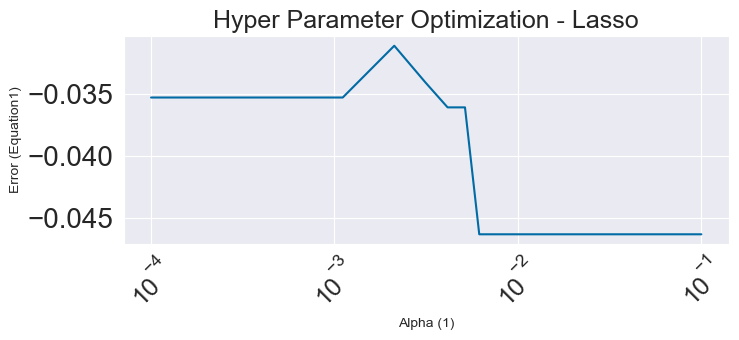

In [127]:
#Lasso: Alpha optimization in graph
fig1=sns.lineplot(data=gsTable[['param_alpha', 'mean_test_score', 'std_test_score',	'rank_test_score']],x='param_alpha',y='mean_test_score',markers= True)
fig1.set(xscale='log')
plt.xticks(rotation=45)
fig1.set(xlabel='Alpha (1)', ylabel='Error (Equation1)')
fig1.axes.set_title("Hyper Parameter Optimization - Lasso",fontsize=18)
plt.savefig("./Figures/5_Lasso_Optimization.png")
plt.show()

In [128]:
alpha_param=grid_search.best_params_['alpha']

lassoHyper = Lasso(alpha = alpha_param, max_iter=10000, random_state=42)
lassoHyper.fit(x_train, y_train)

pred_lassoHyper = lassoHyper.predict(x_test)
pred_lassoHyper

lassoHyper.score(x_test,y_test)   

0.5580893348396483

In [129]:
scores_lasso = cross_val_score(lassoHyper, x_train, y_train, scoring = BeePy_scorer, \
                               cv=logo, groups=train_Groups, n_jobs=-1)

In [130]:
error=np.power(scores_lasso,2)
mse=np.sum(error)/len(scores_lasso)
rmse5_lasso=np.sqrt(mse)
rmse5_lasso

0.057875123947940504

In [131]:
rmse_lasso['Hyper-parameter']=rmse5_lasso
rmse_lasso 

Manual approach (2.2)  Initial ML  Cross Val  Hyper-parameter
0               0.025594    0.049908   0.057875         0.036048

##### 5.2 Ridge Model

In [132]:
# param_grid = {"alpha":[1e-8, 1e-7, 1e-6, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]}

alphas = np.linspace (1e-8, 10000, 1000)
param_grid={"alpha": alphas}

grid_search2 = GridSearchCV(Ridge(), param_grid, scoring=BeePy_scorer, cv=logo, n_jobs = -1)
grid_search2.fit(x_train, y_train, groups=train_Groups)

GridSearchCV(cv=LeaveOneGroupOut(), estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-08, 1.00100100e+01, 2.00200200e+01, 3.00300300e+01,
       4.00400400e+01, 5.00500501e+01, 6.00600601e+01, 7.00700701e+01,
       8.00800801e+01, 9.00900901e+01, 1.00100100e+02, 1.10110110e+02,
       1.20120120e+02, 1.30130130e+02, 1.40140140e+02, 1.50150150e+02,
       1.60160160e+02, 1.701...
       9.76976977e+03, 9.77977978e+03, 9.78978979e+03, 9.79979980e+03,
       9.80980981e+03, 9.81981982e+03, 9.82982983e+03, 9.83983984e+03,
       9.84984985e+03, 9.85985986e+03, 9.86986987e+03, 9.87987988e+03,
       9.88988989e+03, 9.89989990e+03, 9.90990991e+03, 9.91991992e+03,
       9.92992993e+03, 9.93993994e+03, 9.94994995e+03, 9.95995996e+03,
       9.96996997e+03, 9.97997998e+03, 9.98998999e+03, 1.00000000e+04])},
             scoring=make_scorer(error_2))

In [133]:
print(grid_search2.best_params_)
print(grid_search2.best_score_)
grid_search2.score(x_train, y_train)
gsTable2 = pd.DataFrame(grid_search2.cv_results_)
gsTable2[['params','mean_test_score','rank_test_score']]

{'alpha': 1e-08}
-0.03527165921


params  mean_test_score  rank_test_score
0                 {'alpha': 1e-08}        -0.035272                1
1           {'alpha': 10.01001002}        -0.035272                1
2    {'alpha': 20.020020029999998}        -0.035272                1
3    {'alpha': 30.030030039999996}        -0.035272                1
4    {'alpha': 40.040040049999995}        -0.035272                1
..                             ...              ...              ...
995   {'alpha': 9959.959959959999}        -0.035272                1
996       {'alpha': 9969.96996997}        -0.035272                1
997   {'alpha': 9979.979979979998}        -0.035272                1
998       {'alpha': 9989.98998999}        -0.035272                1
999             {'alpha': 10000.0}        -0.035272                1

[1000 rows x 3 columns]

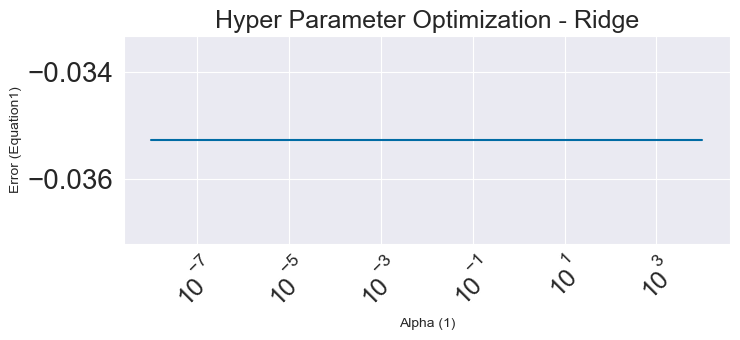

In [134]:
#Ridge: Alpha optimization in graph
fig2=sns.lineplot(data=gsTable2[['param_alpha', 'mean_test_score', 'std_test_score','rank_test_score']],x='param_alpha',y='mean_test_score',markers= True)
fig2.set(xscale='log')
plt.xticks(rotation=45)
fig2.set(xlabel='Alpha (1)', ylabel='Error (Equation1)')
fig2.axes.set_title("Hyper Parameter Optimization - Ridge",fontsize=18)
plt.savefig("./Figures/5_Ridge_Optimization.png")
plt.show()


In [135]:
#Exploration: Why we are getting the same Error Score for all the alphas used. 

alphas = np.linspace (1e-8, 2000, 1000)
test_score=[]

for alpha in alphas:
    ridgeHyper = Ridge(alpha =alpha, max_iter=10000, random_state=42)
    ridgeHyper.fit(x_train, y_train)
    
    pred_ridgeHyper = ridgeHyper.predict(x_test)
    pred_ridgeHyper

    test_score.append(ridgeHyper.score(x_test,y_test))

#Conversion to dataframe to explain
data_ridge = pd.DataFrame(
    {'alphas': alphas,
     'test_score': test_score,
    })

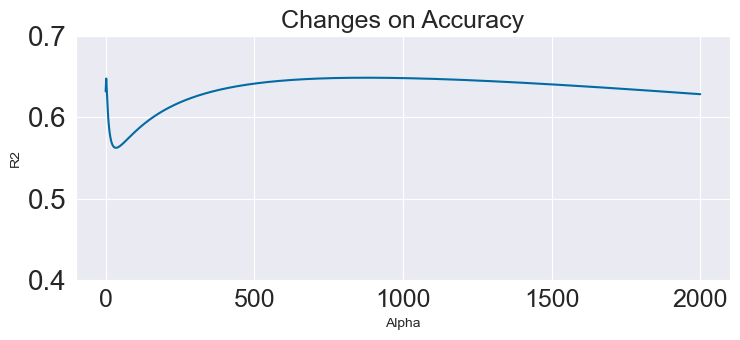

In [136]:
r2_ridge=sns.lineplot(data=data_ridge,x='alphas',y='test_score')
r2_ridge.set_ylim(0.4, 0.7)
r2_ridge.set(xlabel='Alpha', ylabel='R2')
r2_ridge.axes.set_title("Changes on Accuracy",fontsize=18)
plt.savefig("./Figures/5_Ridge_R2.png")
plt.show()

#No matter what alpha we use from a range from 1e-8 to 100
#The capacity of the model to predict the variance of the Cost (Accuracy - R2) changes slightly (less than 0.10).
#Therefore, the suppliers predicted for the model do not change. Consequently, the rest applied by the Equation 1 remains the same (minor price - actual cost of the supplier recommended by the model)

In [137]:
alpha_param=grid_search2.best_params_['alpha']
ridgeHyper = Ridge(alpha = alpha_param, max_iter=10000, random_state=42)
ridgeHyper.fit(x_train, y_train)

pred_ridgeHyper = ridgeHyper.predict(x_test)
pred_ridgeHyper

ridgeHyper.score(x_test,y_test)

0.6321497759118755

In [138]:
scores_ridge = cross_val_score(ridgeHyper, x_train, y_train, scoring = BeePy_scorer, \
    cv=logo, groups=train_Groups, n_jobs=-1)

error=np.power(scores_ridge,2)
mse=np.sum(error)/len(scores_ridge)
rmse5_ridge=np.sqrt(mse)
rmse5_ridge

0.03996679999798722

In [139]:
rmse_ridge['Hyper-parameter']=rmse5_ridge

In [140]:
rmse_ridge

Manual approach (2.2)  Initial ML  Cross Val  Hyper-parameter
0               0.025594    0.040904   0.039967         0.039967

##### 5.3 Elastic Model

In [141]:
# param_grid = {"alpha":[1e-5,1e-4,1e-3,1e-2, 1, 10], "l1_ratio":[1e-5,1e-4, 1e-3,1e-2, 1]} #First range
param_grid = {"alpha":[0.01, 0.1, 1.0, 10, 100], "l1_ratio":np.linspace (0.1,0.001, 100)} #Second range

gs3 = GridSearchCV(Elnet, param_grid, scoring=BeePy_scorer, cv=logo, n_jobs = -1)
gs3.fit(x_train, y_train, groups=train_Groups)

gs3 = GridSearchCV(Elnet, param_grid, scoring=BeePy_scorer, cv=logo, n_jobs = -1)
gs3.fit(x_train, y_train, groups=train_Groups)

GridSearchCV(cv=LeaveOneGroupOut(),
             estimator=ElasticNet(alpha=0.01, max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10, 100],
                         'l1_ratio': array([0.1  , 0.099, 0.098, 0.097, 0.096, 0.095, 0.094, 0.093, 0.092,
       0.091, 0.09 , 0.089, 0.088, 0.087, 0.086, 0.085, 0.084, 0.083,
       0.082, 0.081, 0.08 , 0.079, 0.078, 0.077, 0.076, 0.075, 0.074,
       0.073, 0.072, 0.071, 0.07 , 0.069, 0.068, 0.06...
       0.055, 0.054, 0.053, 0.052, 0.051, 0.05 , 0.049, 0.048, 0.047,
       0.046, 0.045, 0.044, 0.043, 0.042, 0.041, 0.04 , 0.039, 0.038,
       0.037, 0.036, 0.035, 0.034, 0.033, 0.032, 0.031, 0.03 , 0.029,
       0.028, 0.027, 0.026, 0.025, 0.024, 0.023, 0.022, 0.021, 0.02 ,
       0.019, 0.018, 0.017, 0.016, 0.015, 0.014, 0.013, 0.012, 0.011,
       0.01 , 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002,
       0.001])},
             scoring=make_scorer(error_2))

In [142]:
print(gs3.best_params_)
print(gs3.best_score_)
gs3.score(x_train, y_train)
gsTable3 = pd.DataFrame(gs3.cv_results_)
gsTable3[['params','mean_test_score','rank_test_score']]

{'alpha': 0.1, 'l1_ratio': 0.023000000000000007}
-0.031047226130000005


params  mean_test_score  \
0                     {'alpha': 0.01, 'l1_ratio': 0.1}        -0.035272   
1                   {'alpha': 0.01, 'l1_ratio': 0.099}        -0.035272   
2                   {'alpha': 0.01, 'l1_ratio': 0.098}        -0.035272   
3                   {'alpha': 0.01, 'l1_ratio': 0.097}        -0.035272   
4                   {'alpha': 0.01, 'l1_ratio': 0.096}        -0.035272   
..                                                 ...              ...   
495  {'alpha': 100, 'l1_ratio': 0.0050000000000000044}        -0.046304   
496  {'alpha': 100, 'l1_ratio': 0.0040000000000000036}        -0.046304   
497  {'alpha': 100, 'l1_ratio': 0.0030000000000000027}        -0.046304   
498  {'alpha': 100, 'l1_ratio': 0.0020000000000000018}        -0.046304   
499                  {'alpha': 100, 'l1_ratio': 0.001}        -0.046304   

     rank_test_score  
0                 27  
1                 27  
2                 27  
3                 27  
4                 27  
..               ...  
495              164  
496              164  
497              164  
498              164  
499              164  

[500 rows x 3 columns]

In [143]:
gsTable3_plot=pd.DataFrame(gsTable3[['params','param_alpha','param_l1_ratio','mean_test_score','rank_test_score']])
gsTable3_plot=gsTable3_plot.loc[(gsTable3_plot['param_alpha'].isin([0.01, 0.1, 1.0, 10, 100]))&(gsTable3_plot['param_l1_ratio'].isin([0.1,0.05,0.023000000000000007,0.01200000000000001]))]

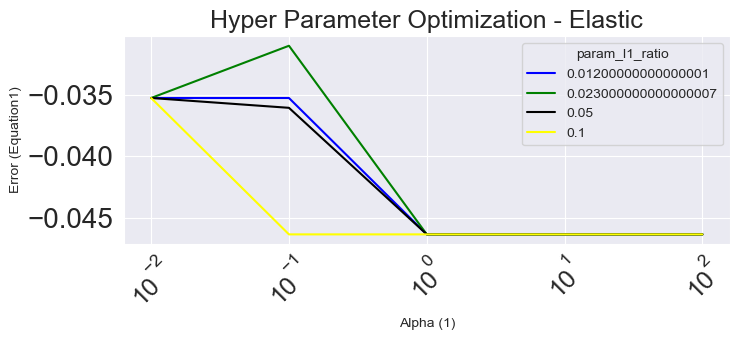

In [144]:
# Elastic: Alpha optimization in graph
fig3=sns.lineplot(data=gsTable3_plot,x='param_alpha',y='mean_test_score',hue='param_l1_ratio',markers= True,palette=['blue','green','black','yellow'])
fig3.set(xscale='log')
plt.xticks(rotation=45)
fig3.set(xlabel='Alpha (1)', ylabel='Error (Equation1)')
fig3.axes.set_title("Hyper Parameter Optimization - Elastic",fontsize=18)
plt.savefig("./Figures/5_Elastic_Optimization.png")
plt.show()

In [145]:
Elnet = ElasticNet(alpha= gs3.best_params_['alpha'], l1_ratio= gs3.best_params_['l1_ratio'], max_iter=10000, random_state=42)
Elnet.fit(x_train, y_train)

pred_ElasticNet = Elnet.predict(x_test)
pred_ElasticNet

Elnet.score(x_test,y_test)

scores_elastic = cross_val_score(Elnet, x_train, y_train, scoring = BeePy_scorer, \
    cv=logo, groups=train_Groups, n_jobs=-1)

error=np.power(scores_elastic,2)
mse=np.sum(error)/len(scores_elastic)
rmse5_ela=np.sqrt(mse)
rmse5_ela

rmse_elastic['Hyper-parameter']=rmse5_ela

rmse_elastic

Manual approach (2.2)  Initial ML  Cross Val  Hyper-parameter
0               0.025594    0.039764   0.042252         0.036005

In [146]:
total_model = pd.concat([rmse_lasso,rmse_ridge,rmse_elastic],axis = 0)

### Conclusion

In [147]:
total_model

Manual approach (2.2)  Initial ML  Cross Val  Hyper-parameter
0               0.025594    0.049908   0.057875         0.036048
0               0.025594    0.040904   0.039967         0.039967
0               0.025594    0.039764   0.042252         0.036005

In [148]:
total_model.insert(0,'Model',['Lasso','Ridge','Elastic'])

In [149]:
total_model

Model  Manual approach (2.2)  Initial ML  Cross Val  Hyper-parameter
0    Lasso               0.025594    0.049908   0.057875         0.036048
0    Ridge               0.025594    0.040904   0.039967         0.039967
0  Elastic               0.025594    0.039764   0.042252         0.036005

In [150]:
total_model = total_model.set_index('Model')

In [151]:
total_model

Manual approach (2.2)  Initial ML  Cross Val  Hyper-parameter
Model                                                                 
Lasso                 0.025594    0.049908   0.057875         0.036048
Ridge                 0.025594    0.040904   0.039967         0.039967
Elastic               0.025594    0.039764   0.042252         0.036005

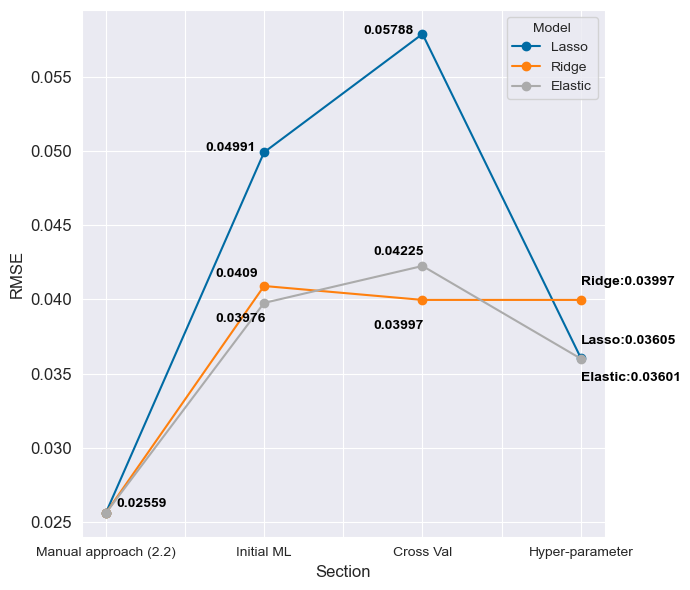

In [160]:
#Plot
ax = total_model.T.plot(figsize = (7,6),marker = 'o')
ax.set_ylabel('RMSE',fontsize = 12)
ax.set_xlabel('Section',fontsize = 12)
#Fist Approach
plt.text(0.07, 0.026, str(round(total_model.loc['Lasso','Manual approach (2.2)'],5)), size='medium', color='black', weight='semibold')
#Lasso
plt.text(0.63, 0.05, str(round(total_model.loc['Lasso','Initial ML'],5)), size='medium', color='black', weight='semibold')
plt.text(1.63, 0.0579, str(round(total_model.loc['Lasso','Cross Val'],5)), size='medium', color='black', weight='semibold')
plt.text(3, 0.037, 'Lasso:' + str(round(total_model.loc['Lasso','Hyper-parameter'],5)), size='medium', color='black', weight='semibold')
#Ridge
plt.text(0.69, 0.0415, str(round(total_model.loc['Ridge','Initial ML'],5)), size='medium', color='black', weight='semibold')
plt.text(1.69, 0.038, str(round(total_model.loc['Ridge','Cross Val'],5)), size='medium', color='black', weight='semibold')
plt.text(3, 0.041, 'Ridge:' + str(round(total_model.loc['Ridge','Hyper-parameter'],5)), size='medium', color='black', weight='semibold')
#Elastic
plt.text(0.69, 0.0385, str(round(total_model.loc['Elastic','Initial ML'],5)), size='medium', color='black', weight='semibold')
plt.text(1.69, 0.043, str(round(total_model.loc['Elastic','Cross Val'],5)), size='medium', color='black', weight='semibold')
plt.text(3, 0.0345, 'Elastic:' + str(round(total_model.loc['Elastic','Hyper-parameter'],5)), size='medium', color='black', weight='semibold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.show()

